
### Use Global Infection Data to Analysis


In [1]:
import pandas as pd

# Read the Excel file
try:
    df = pd.read_excel('world_covid.xlsx')
    print("Excel file read successfully")
except FileNotFoundError:
    print("File not found, please check the file path")
    raise

# Convert the 'date' column to datetime type
try:
    df['date'] = pd.to_datetime(df['date'])
    print("Date column converted successfully")
except KeyError:
    print("Date column 'date' not found, please check the column name")
    raise

# Group by month and calculate the total cases for each month
try:
    df['month'] = df['date'].dt.to_period('M')
    monthly_cases = df.groupby('month')['new_cases'].sum()
    print("Monthly cases calculated successfully")
except KeyError:
    print("Cases column 'new_cases' not found, please check the column name")
    raise

# Save the result in a new DataFrame
result_df_world = pd.DataFrame({
    'month': monthly_cases.index.astype(str),
    'new_cases': monthly_cases.values
})

# Display the result
print(result_df_world)

Excel file read successfully
Date column converted successfully
Monthly cases calculated successfully
      month  new_cases
0   2020-01       2033
1   2020-02      76214
2   2020-03     611707
3   2020-04    2037922
4   2020-05    3163451
5   2020-06    3936842
6   2020-07    6074723
7   2020-08    9261926
8   2020-09    8143085
9   2020-10   10187462
10  2020-11   19566436
11  2020-12   17255870
12  2021-01   22070633
13  2021-02   11022033
14  2021-03   12861645
15  2021-04   19601773
16  2021-05   23734840
17  2021-06   10822935
18  2021-07   13410750
19  2021-08   22253836
20  2021-09   15484337
21  2021-10   15086099
22  2021-11   14569045
23  2021-12   19380554
24  2022-01   94694159
25  2022-02   59761654
26  2022-03   46082485
27  2022-04   26970423
28  2022-05   18751417
29  2022-06   15145267
30  2022-07   32981058
31  2022-08   22850430
32  2022-09   14173487
33  2022-10   15057500
34  2022-11   10483582
35  2022-12   67065915
36  2023-01   47674052
37  2023-02    4851818
3

In [2]:
import pandas as pd
from dateutil import parser

# Read the existing result_df DataFrame

# Convert the 'month' column in result_df to Period type
result_df_world['month'] = pd.to_datetime(result_df_world['month']).dt.to_period('M')

# Read the Monthly_figures_on_aviation CSV file
aviation_df = pd.read_csv('Monthly_figures_on_aviation.csv')

# Assume aviation_df has a date column 'Periods' and other data columns
# Use dateutil.parser to parse the date column
aviation_df['date'] = aviation_df['Periods'].apply(lambda x: parser.parse(x, fuzzy=True))

# Group by month
aviation_df['month'] = aviation_df['date'].dt.to_period('M')

# Drop the original date column
aviation_df = aviation_df.drop(columns=['Periods'])

# Merge the two DataFrames by month, filling unmatched months with 0 for new_cases
merged_df = pd.merge(result_df_world, aviation_df, on='month', how='outer').fillna({'new_cases': 0})

# Display the result
print(merged_df)

      month  new_cases              Airports  \
0   2019-01        0.0  Total Dutch airports   
1   2019-02        0.0  Total Dutch airports   
2   2019-03        0.0  Total Dutch airports   
3   2019-04        0.0  Total Dutch airports   
4   2019-05        0.0  Total Dutch airports   
..      ...        ...                   ...   
63  2024-04   147440.0  Total Dutch airports   
64  2024-05   136159.0  Total Dutch airports   
65  2024-06   190568.0  Total Dutch airports   
66  2024-07   201714.0  Total Dutch airports   
67  2024-08    47169.0  Total Dutch airports   

    Aircraft movements/Cross-country flights (number)  \
0                                               43492   
1                                               41972   
2                                               47712   
3                                               51400   
4                                               55561   
..                                                ...   
63                      

### Analysis and Visualization of Question 1 and 2

In this section, we analyze the global COVID-19 infection data and its impact on aviation activities. The analysis includes the following steps:

1. **Data Reading and Preprocessing**:
    - Read the global COVID-19 infection data from an Excel file.
    - Convert the 'date' column to datetime format.
    - Group the data by month and calculate the total number of new cases for each month.

2. **Merging with Aviation Data**:
    - Read the monthly aviation data from a CSV file.
    - Parse the date column and group the data by month.
    - Merge the COVID-19 data with the aviation data on the 'month' column.

3. **Visualization**:
    - Plot the number of new COVID-19 cases and various aviation-related variables over time.
    - Use line charts to visualize the trends and relationships between the variables.

The following plots are generated to visualize the data:

1. **Aircraft Movements and COVID-19 New Cases Over Time**:
    - Cross-country flights and local flights are plotted on the primary y-axis.
    - New COVID-19 cases are plotted on the secondary y-axis.

2. **Commercial Air Traffic and COVID-19 New Cases Over Time**:
    - Total passengers, total cargo, and total mail are plotted on the primary y-axis.
    - New COVID-19 cases are plotted on the secondary y-axis.

These visualizations help us understand the impact of the COVID-19 pandemic on aviation activities and identify any potential correlations between the variables.

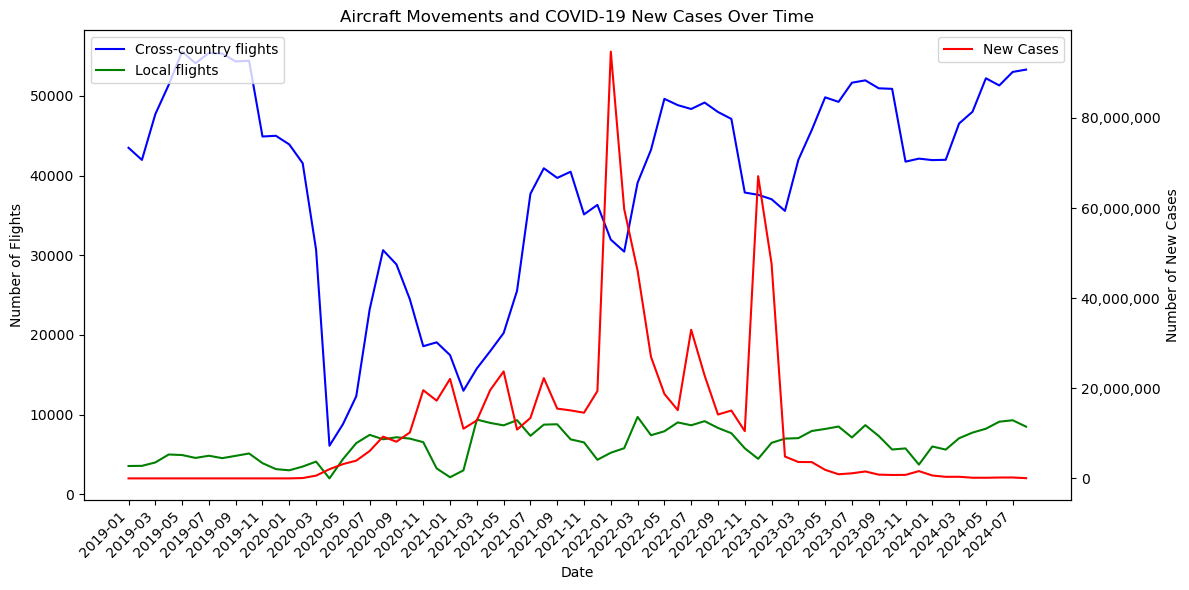

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first three columns as line charts on the first y-axis
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Cross-country flights (number)'], label='Cross-country flights', color='blue')
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Local flights (number)'], label='Local flights', color='green')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Format the second y-axis to remove scientific notation
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
plt.show()

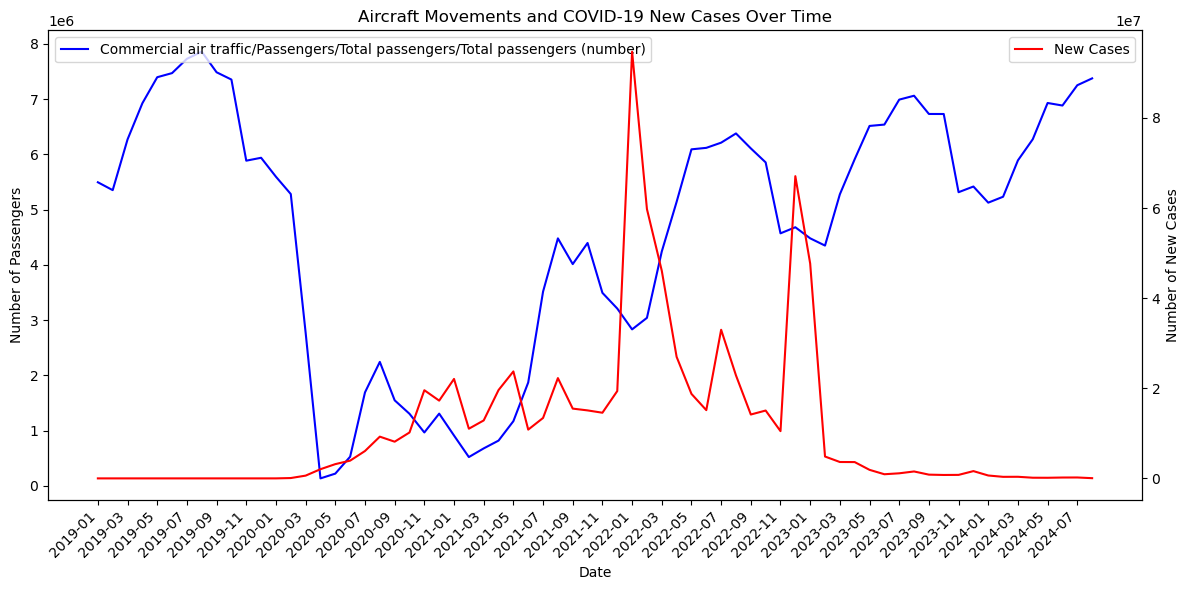

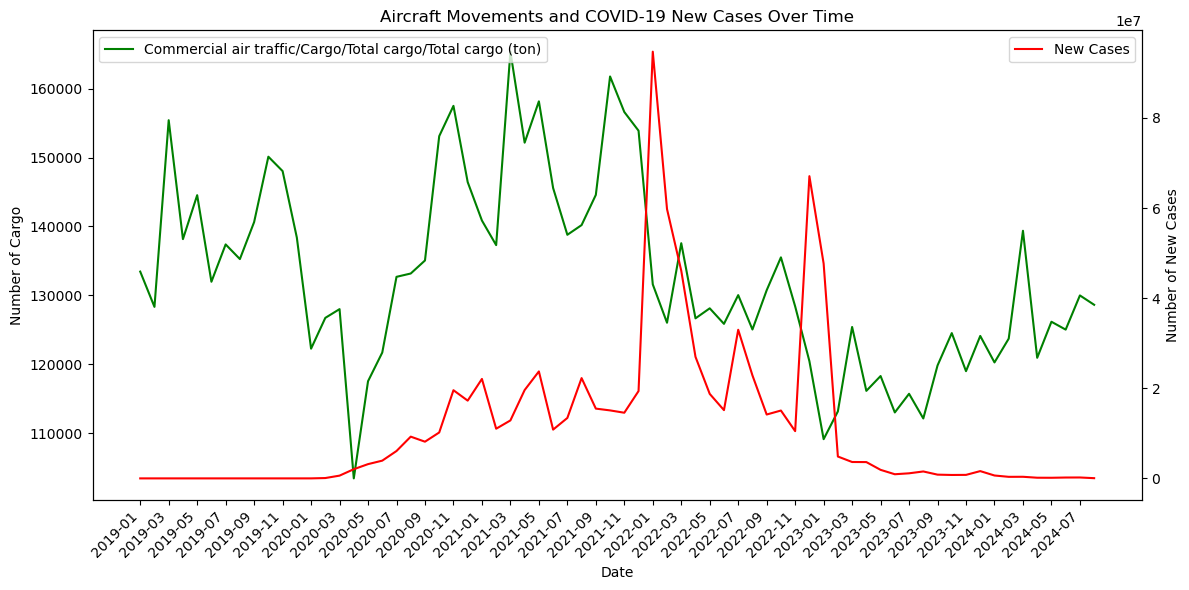

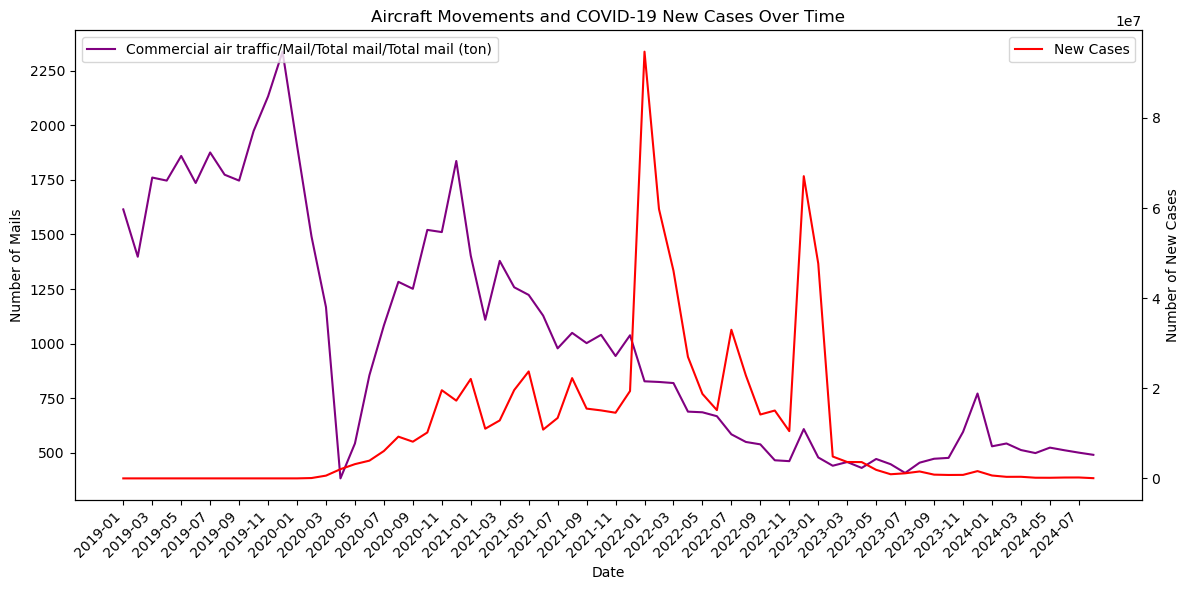

In [4]:
import matplotlib.pyplot as plt

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size for the first plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -4], label=merged_df.columns[-4], color='blue')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the first plot
plt.show()

# Set the figure size for the second plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the second of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -3], label=merged_df.columns[-3], color='green')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cargo')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the second plot
plt.show()

# Set the figure size for the third plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the third of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -2], label=merged_df.columns[-2], color='purple')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Mails')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the third plot
plt.show()

### Adding Vaccination and Death Data for Correlation Analysis

In this section, we will incorporate vaccination and COVID-19 death data to explore potential correlations with aviation-related variables. The steps include:

1. **Data Integration**: Merge the monthly vaccination and death data with the existing dataset.
2. **Correlation Calculation**: Calculate the correlation coefficients between the number of new COVID-19 cases, vaccination data, death data, and aviation-related variables.
3. **Analysis**: Analyze the correlation coefficients to understand the relationships between these variables.

The variables analyzed include:

- **Aviation-related Variables**:
    - Aircraft movements/Local flights (number)
    - Aircraft movements/Cross-country flights (number)
    - Commercial air traffic/Passengers/Total passengers/Total passengers (number)
    - Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
    - Commercial air traffic/Mail/Total mail/Total mail (ton)

- **COVID-19 Related Variables**:
    - New COVID-19 cases
    - Monthly deaths
    - Monthly vaccinations

By examining these correlations, we aim to uncover insights into how the pandemic and vaccination efforts have impacted aviation activities.

In [5]:
import pandas as pd

# Read the new_deaths.csv file
new_deaths_df = pd.read_csv('new_deaths.csv')

# Assume new_deaths_df has a 'date' column and a 'World' column
# Convert the 'date' column to datetime type
new_deaths_df['date'] = pd.to_datetime(new_deaths_df['date'])

# Aggregate the 'World' column data by month
new_deaths_df['month'] = new_deaths_df['date'].dt.to_period('M')
monthly_deaths = new_deaths_df.groupby('month')['World'].sum().reset_index()

# Read the vaccinations.csv file
vaccinations_df = pd.read_csv('vaccinations.csv')

# Assume vaccinations_df has a 'date' column and a 'people_fully_vaccinated' column
# Convert the 'date' column to datetime type
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date'])

# Aggregate the 'people_fully_vaccinated' column data by month
vaccinations_df['month'] = vaccinations_df['date'].dt.to_period('M')
monthly_vaccinations = vaccinations_df.groupby('month')['people_fully_vaccinated'].sum().reset_index()

# Display results
print("Monthly Deaths:")
print(monthly_deaths)
print("\nMonthly Vaccinations:")
print(monthly_vaccinations)

Monthly Deaths:
      month   World
0   2020-01      62
1   2020-02    2409
2   2020-03   35799
3   2020-04  178886
4   2020-05  184334
5   2020-06  144336
6   2020-07  162506
7   2020-08  219379
8   2020-09  160002
9   2020-10  156799
10  2020-11  323684
11  2020-12  329388
12  2021-01  484000
13  2021-02  303230
14  2021-03  253439
15  2021-04  333155
16  2021-05  440629
17  2021-06  258619
18  2021-07  234213
19  2021-08  345972
20  2021-09  246781
21  2021-10  247085
22  2021-11  204631
23  2021-12  197605
24  2022-01  268246
25  2022-02  281424
26  2022-03  175992
27  2022-04   85772
28  2022-05   61087
29  2022-06   38226
30  2022-07   72771
31  2022-08   65628
32  2022-09   46160
33  2022-10   55618
34  2022-11   40252
35  2022-12   57961
36  2023-01   85959
37  2023-02   96106
38  2023-03   26682
39  2023-04   26841
40  2023-05   15372
41  2023-06    8226
42  2023-07    5262
43  2023-08    6625
44  2023-09    8827
45  2023-10   13988
46  2023-11   10707
47  2023-12   18055
48  

### Correlation with new cases Deaths and Vaccinations

In this section, we calculate the correlation coefficient between each variable and the number of deaths as well as the number of vaccinations and new cases. The variables analyzed include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

These coefficients indicate the strength and direction of the linear relationship between each variable and the number of deaths as well as the number of vaccinations.

In [6]:
# Convert 'month' column to string format for merging
monthly_deaths['month'] = monthly_deaths['month'].astype(str)
monthly_vaccinations['month'] = monthly_vaccinations['month'].astype(str)

# Merge monthly_deaths and monthly_vaccinations with merged_df on 'month'
merged_df = pd.merge(merged_df, monthly_deaths, on='month', how='left', suffixes=('', '_deaths'))
merged_df = pd.merge(merged_df, monthly_vaccinations, on='month', how='left', suffixes=('', '_vaccinations'))

# Rename the columns for clarity
merged_df.rename(columns={'World': 'monthly_deaths', 'people_fully_vaccinated': 'monthly_vaccinations'}, inplace=True)
# Fill all NaN values in merged_df with 0
merged_df.fillna(0, inplace=True)

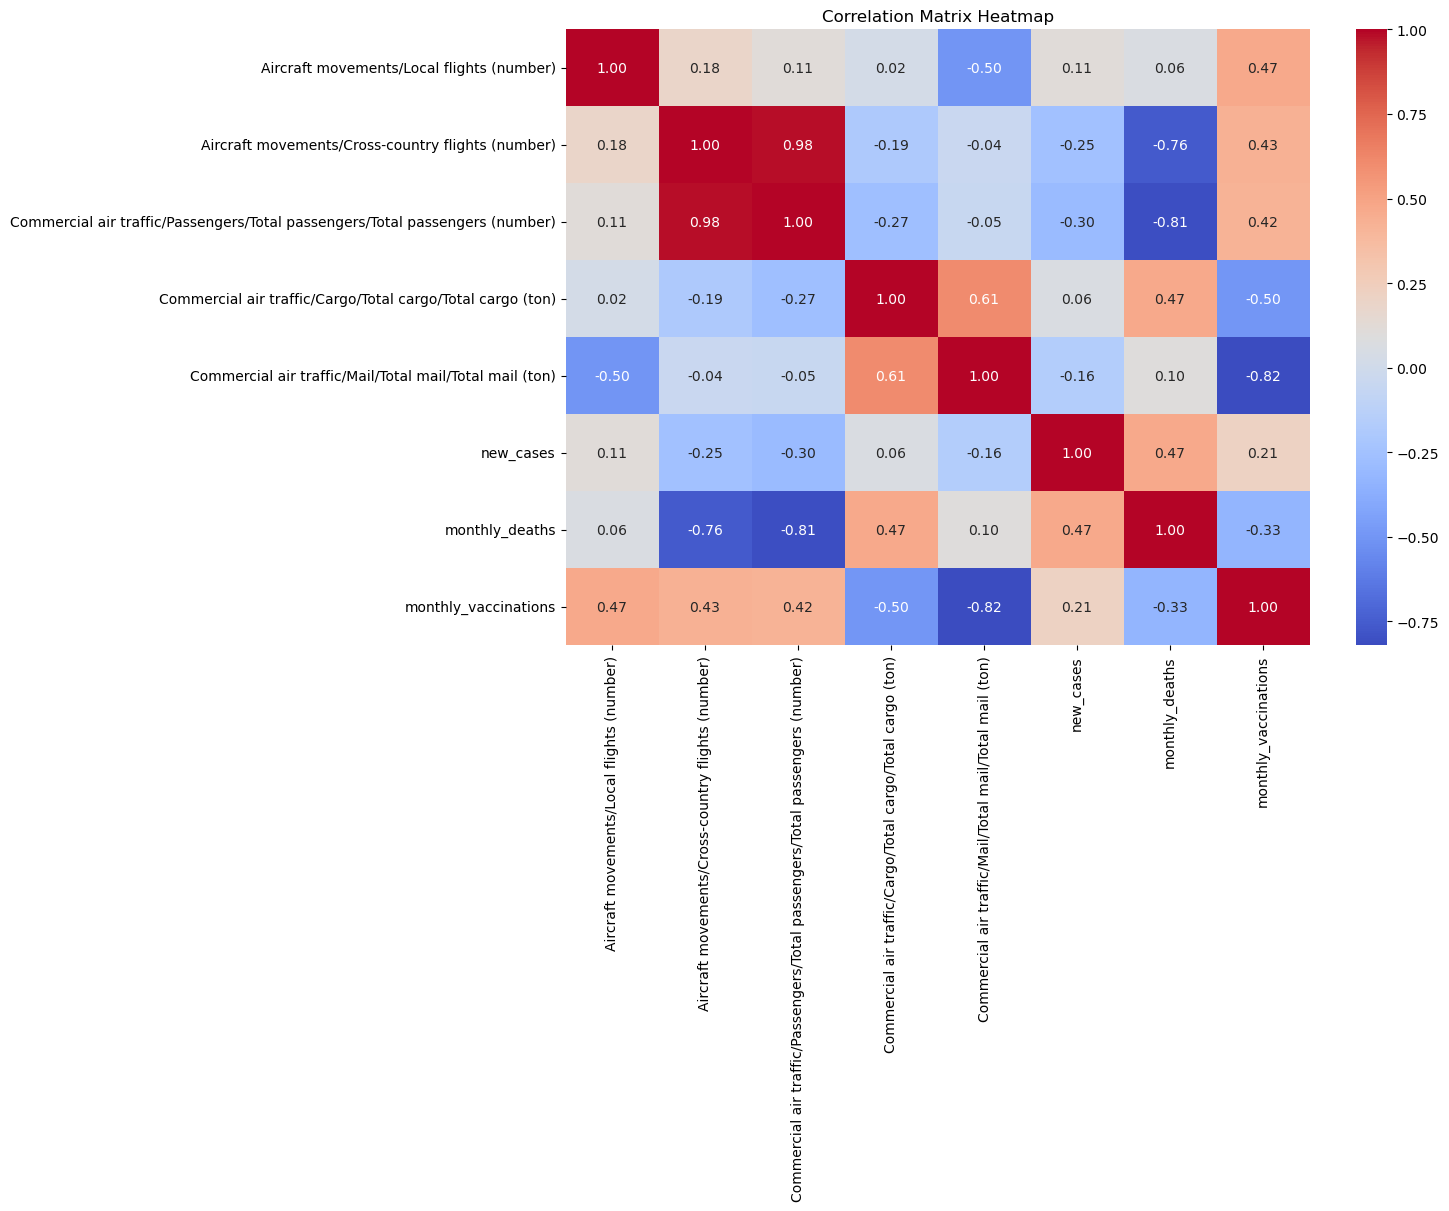

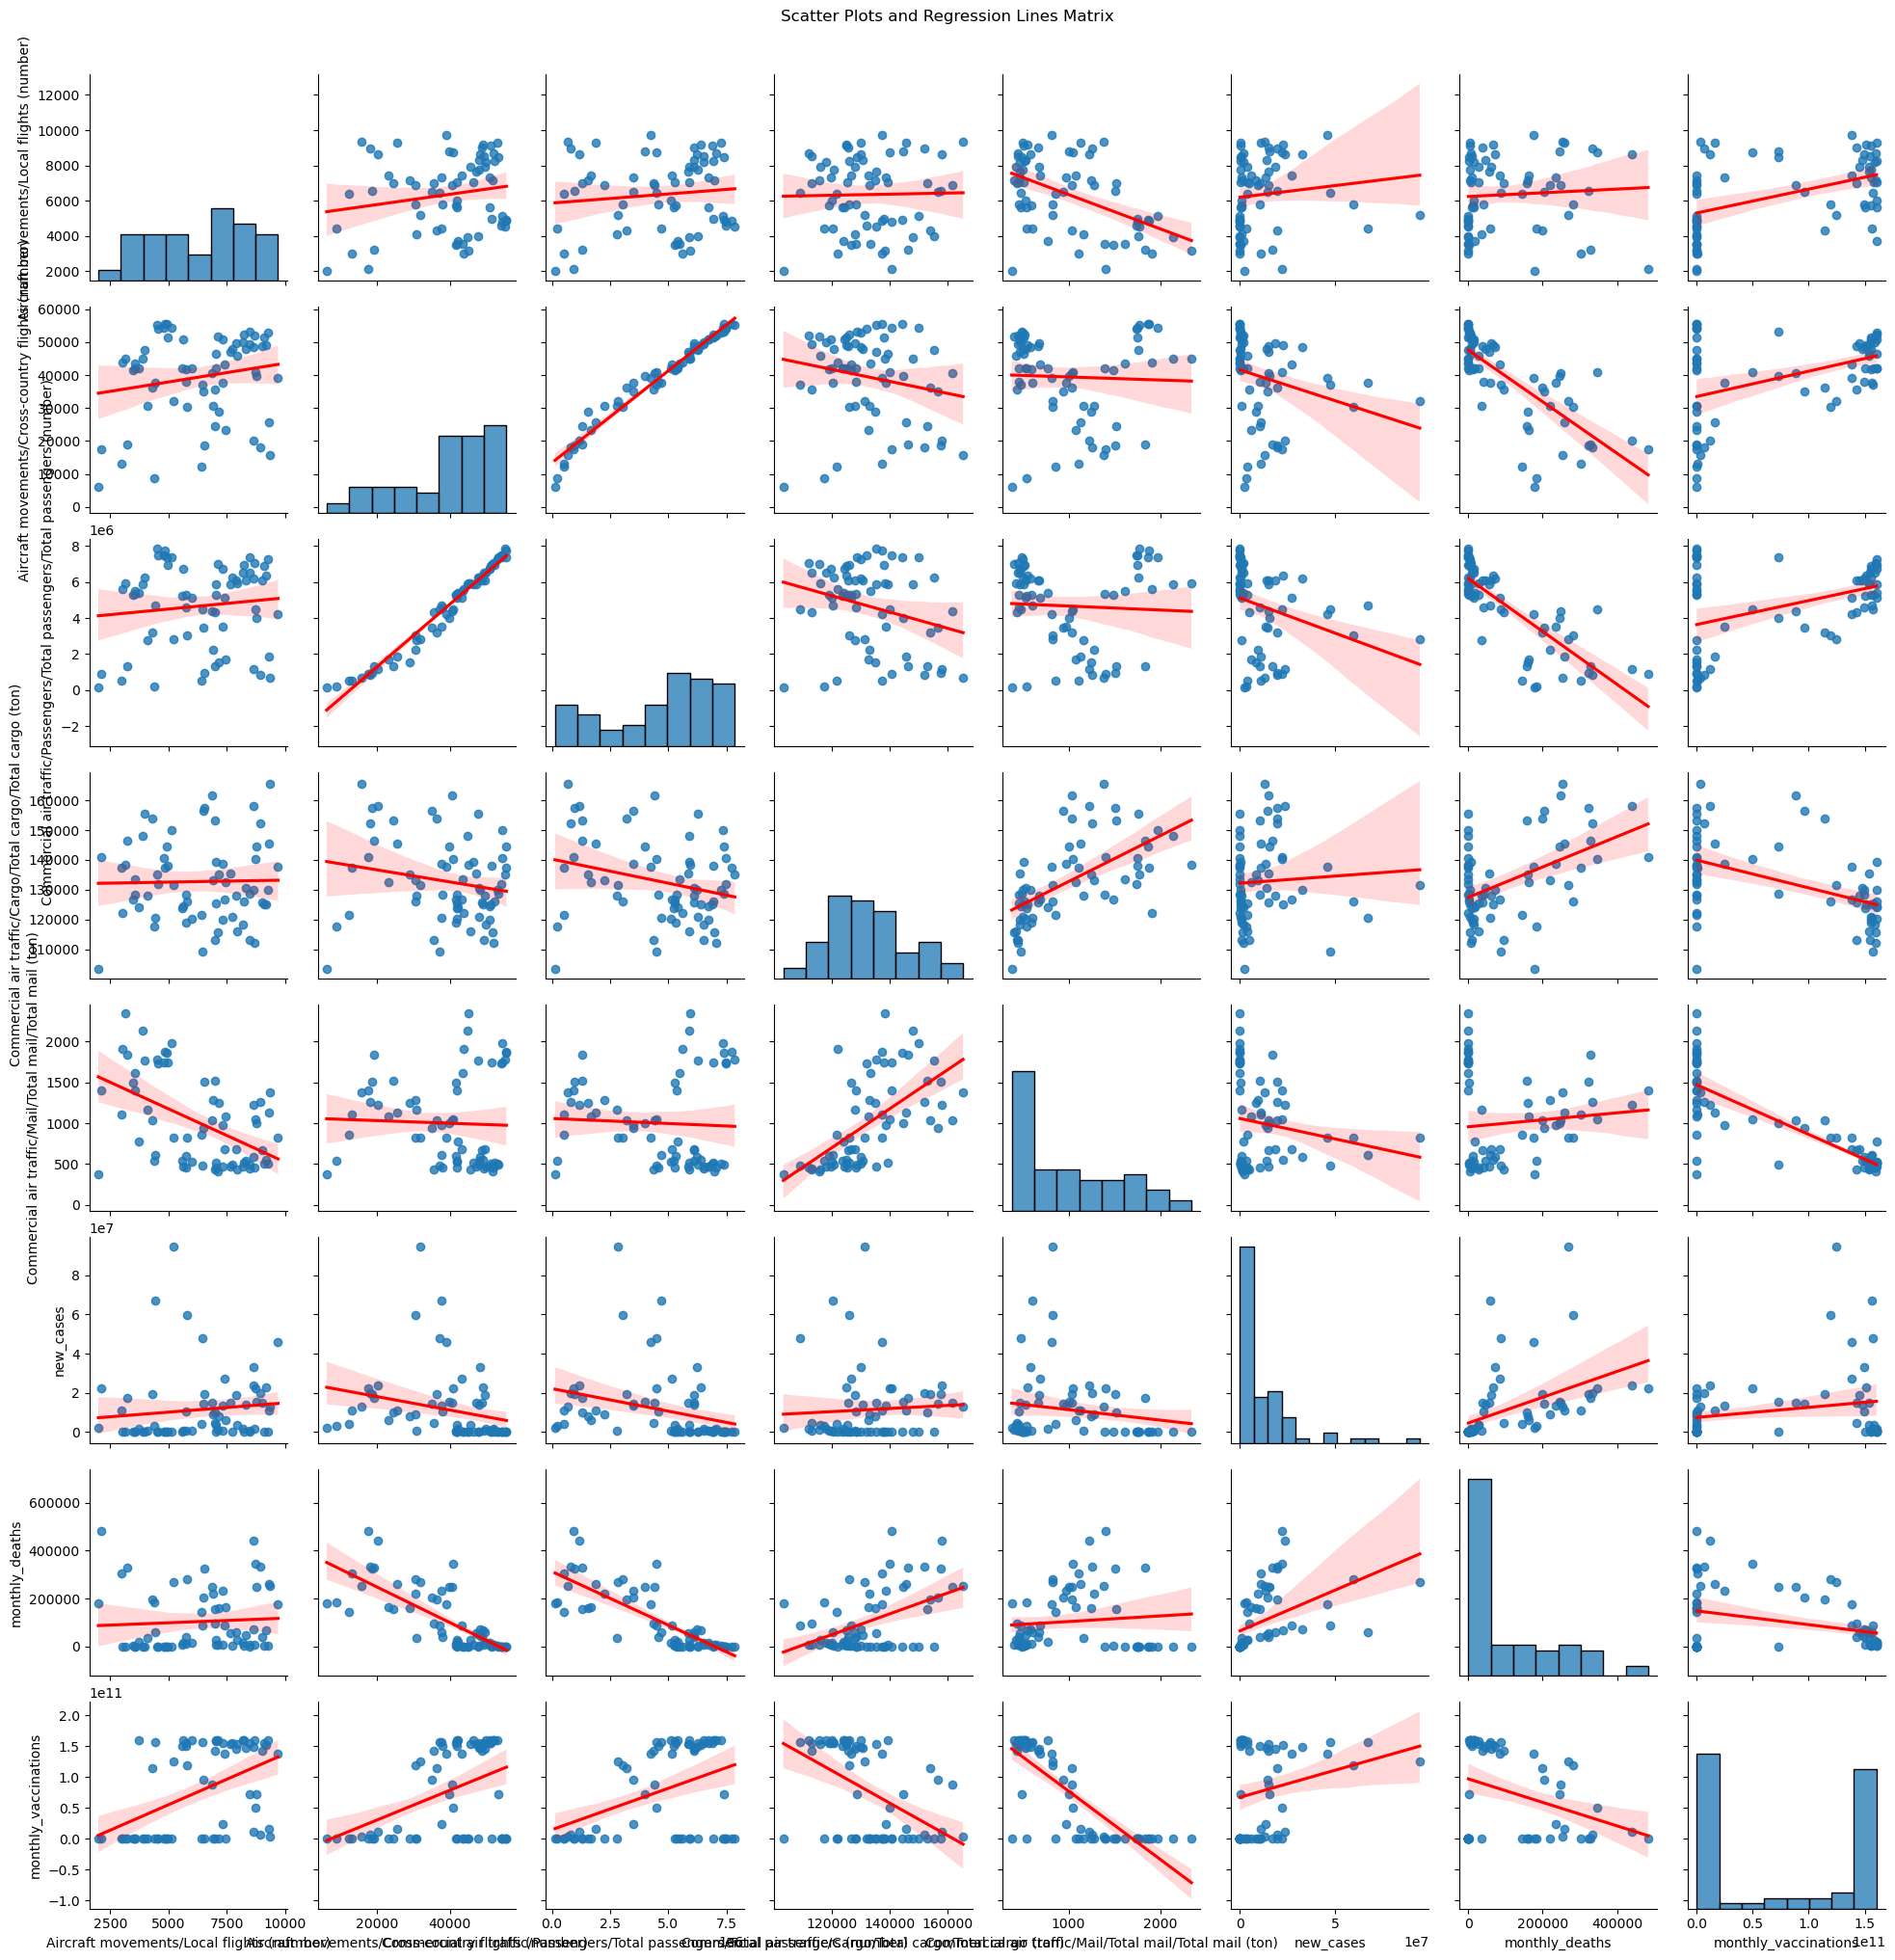

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Select columns of interest
columns_of_interest = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Add pandemic-related variables
pandemic_related_columns = ['new_cases', 'monthly_deaths', 'monthly_vaccinations']

# Combine columns of interest and pandemic-related columns
all_columns = columns_of_interest + pandemic_related_columns

# Calculate correlation matrix
correlation_matrix = merged_df[all_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot pairplot with regression lines
pairplot_data = merged_df[all_columns]
sns.pairplot(pairplot_data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plots and Regression Lines Matrix', y=1.02)
plt.show()


### Plot the five aviation-related variables along with the two newly imported COVID-19 data variables (monthly deaths and monthly vaccinations). The plots will help visualize the trends and relationships between these variables over time.


1. Aircraft movements/Local flights (number)
2. Aircraft movements/Cross-country flights (number)
3. Commercial air traffic/Passengers/Total passengers/Total passengers (number)
4. Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
5. Commercial air traffic/Mail/Total mail/Total mail (ton)
6. Monthly deaths
7. Monthly vaccinations

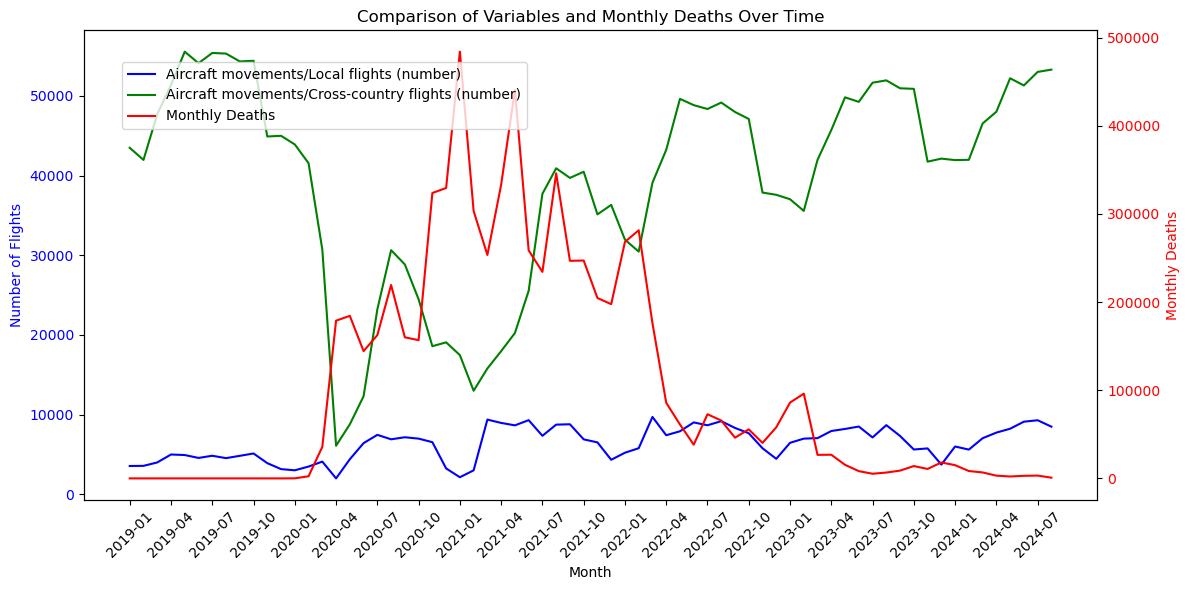

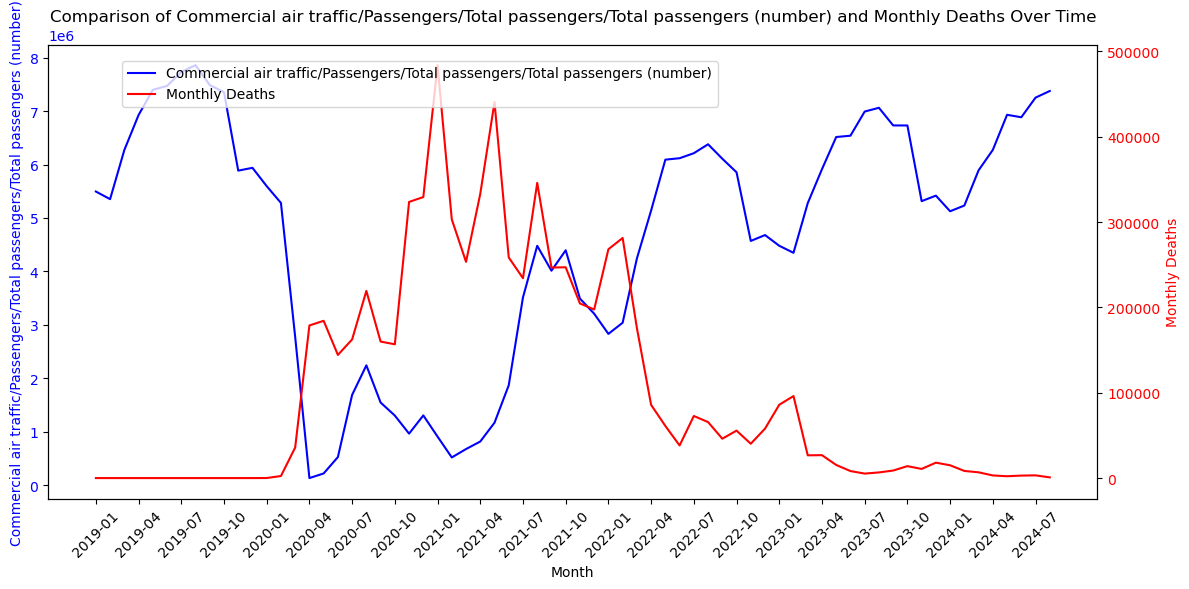

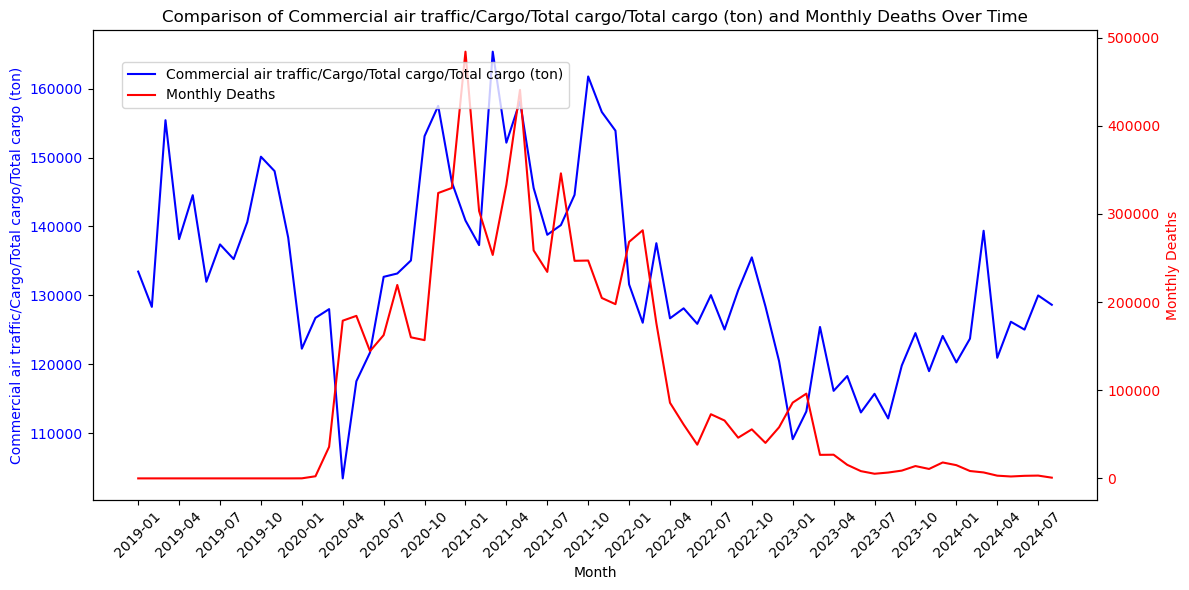

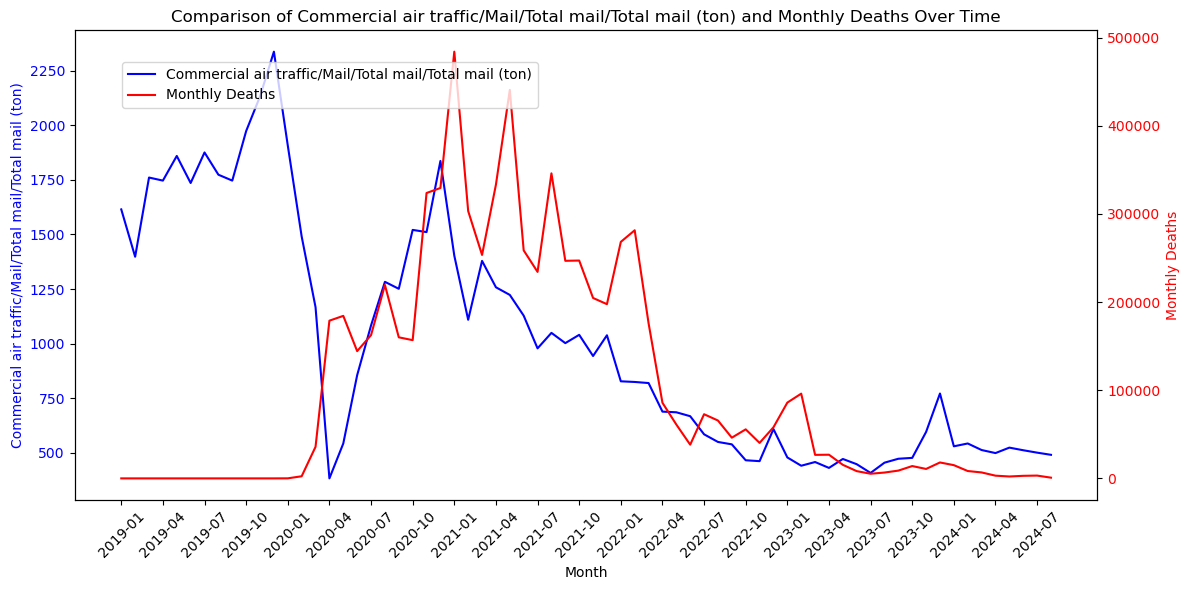

In [8]:
import matplotlib.pyplot as plt

# Define the variables to plot
variables_to_plot = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first two variables
ax1.plot(merged_df['month'], merged_df[variables_to_plot[0]], label=variables_to_plot[0], color='blue')
ax1.plot(merged_df['month'], merged_df[variables_to_plot[1]], label=variables_to_plot[1], color='green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
plt.xticks(rotation=45)

# Create a second y-axis for monthly deaths
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['monthly_deaths'], label='Monthly Deaths', color='red')
ax2.set_ylabel('Monthly Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Comparison of Variables and Monthly Deaths Over Time')

# Show the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

# Show the plot
plt.show()

# Plot each remaining variable with monthly deaths
for variable in variables_to_plot[2:]:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the variable
    ax1.plot(merged_df['month'], merged_df[variable], label=variable, color='blue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel(variable, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
    plt.xticks(rotation=45)

    # Create a second y-axis for monthly deaths
    ax2 = ax1.twinx()
    ax2.plot(merged_df['month'], merged_df['monthly_deaths'], label='Monthly Deaths', color='red')
    ax2.set_ylabel('Monthly Deaths', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the title
    plt.title(f'Comparison of {variable} and Monthly Deaths Over Time')

    # Show the legend
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

    # Show the plot
    plt.show()


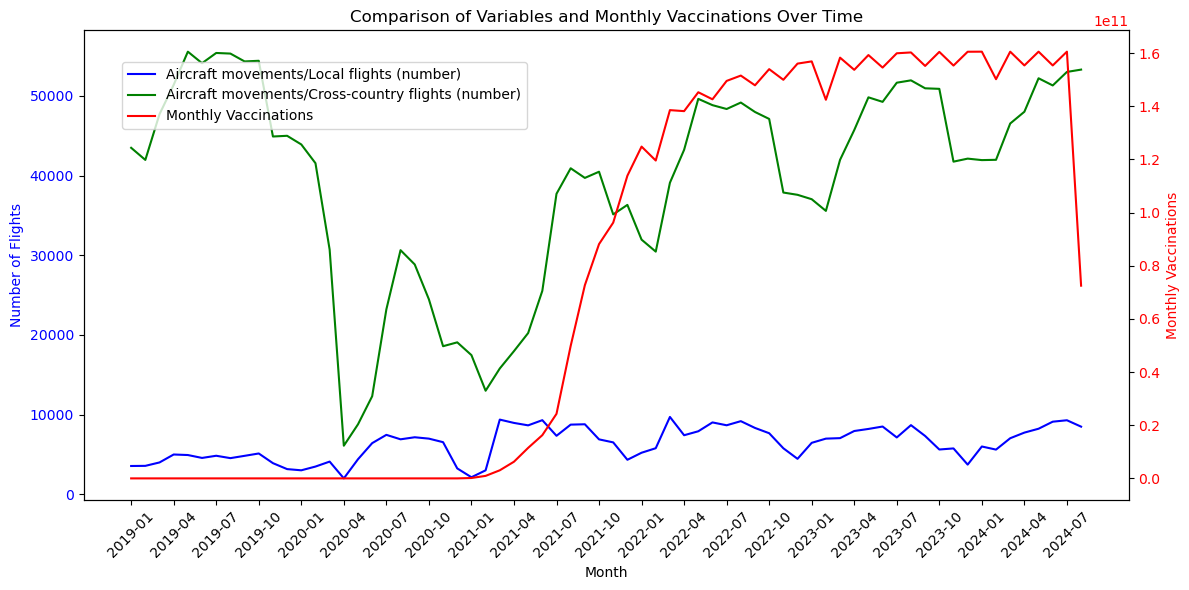

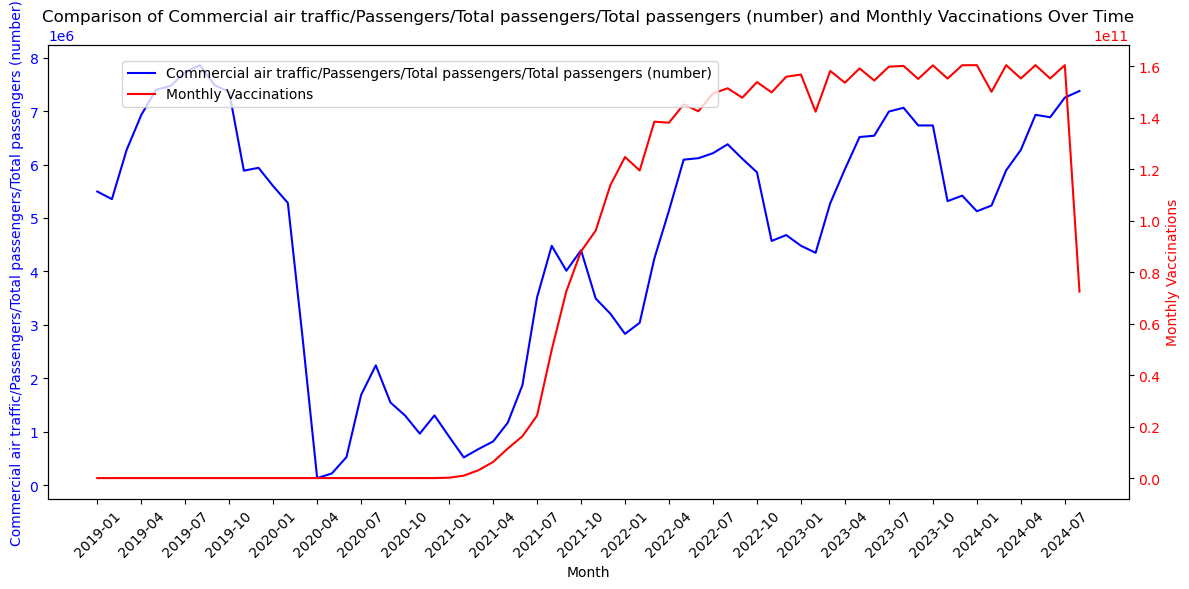

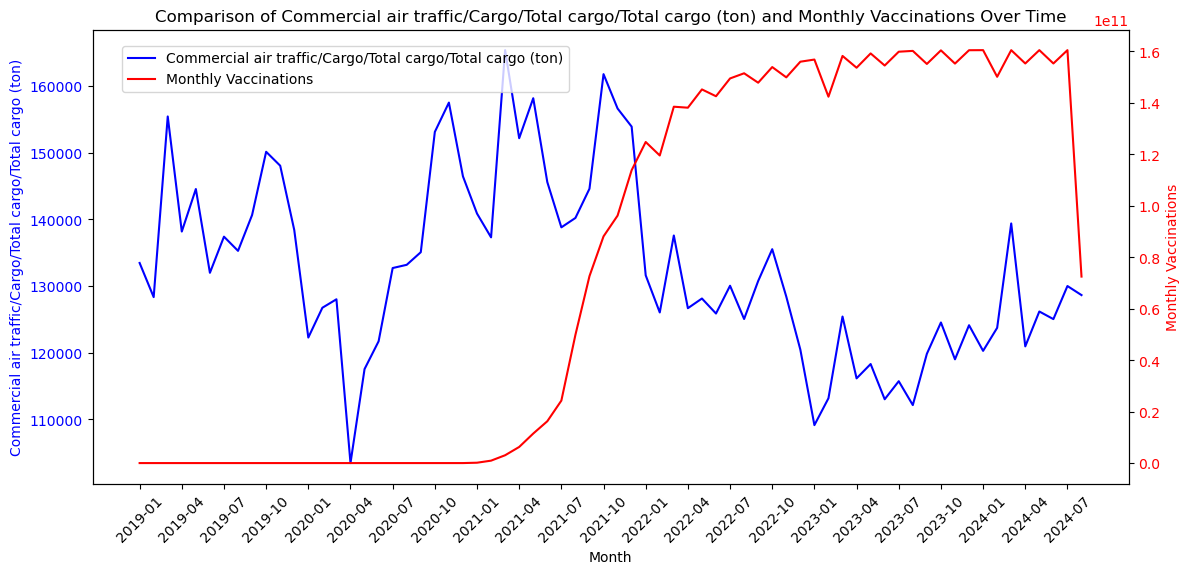

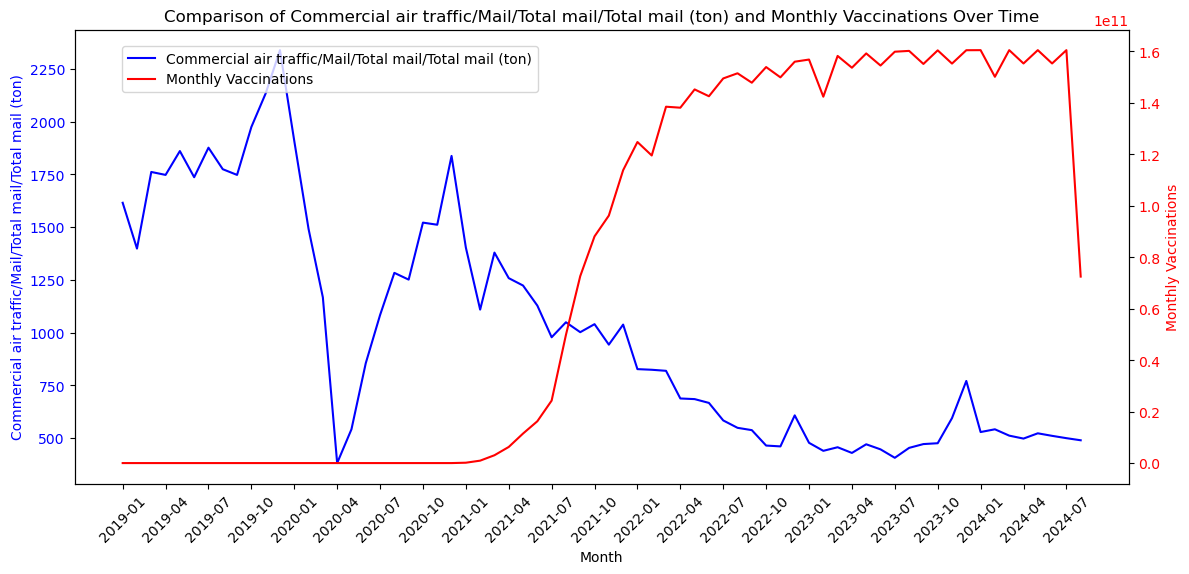

In [9]:
# Plot the first two variables with monthly vaccinations
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable
ax1.plot(merged_df['month'], merged_df[variables_to_plot[0]], label=variables_to_plot[0], color='blue')
ax1.plot(merged_df['month'], merged_df[variables_to_plot[1]], label=variables_to_plot[1], color='green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
plt.xticks(rotation=45)

# Create a second y-axis for monthly vaccinations
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['monthly_vaccinations'], label='Monthly Vaccinations', color='red')
ax2.set_ylabel('Monthly Vaccinations', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Comparison of Variables and Monthly Vaccinations Over Time')

# Show the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

# Show the plot
plt.show()

# Plot each of the last three variables with monthly vaccinations
for variable in variables_to_plot[2:]:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the variable
    ax1.plot(merged_df['month'], merged_df[variable], label=variable, color='blue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel(variable, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(ax1.get_xticks()[::3])  # Show every third label
    plt.xticks(rotation=45)

    # Create a second y-axis for monthly vaccinations
    ax2 = ax1.twinx()
    ax2.plot(merged_df['month'], merged_df['monthly_vaccinations'], label='Monthly Vaccinations', color='red')
    ax2.set_ylabel('Monthly Vaccinations', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the title
    plt.title(f'Comparison of {variable} and Monthly Vaccinations Over Time')

    # Show the legend
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
    plt.rcParams.update({'xtick.labelsize': 10})  # Update the font size for x-axis labels

    # Show the plot
    plt.show()

### Attempting Multiple Linear Regression

In this section, we will attempt to use a Multiple Linear Regression model to predict various aviation-related variables based on the number of new COVID-19 cases, monthly deaths, and monthly vaccinations. The variables we will analyze include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

We will split the data into training and testing sets, fit the Multiple Linear Regression model, and evaluate its performance using metrics such as Mean Squared Error (MSE) and R-squared (R²). Additionally, we will visualize the actual vs. predicted values for each variable.

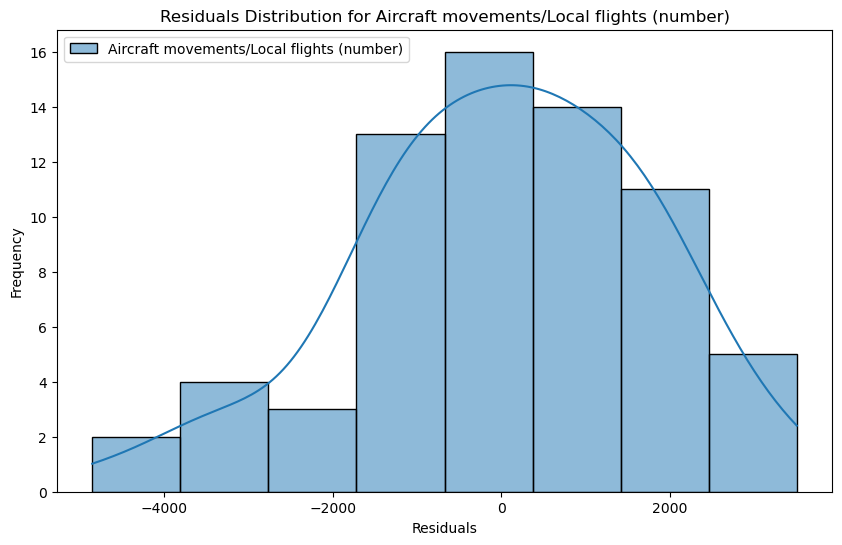

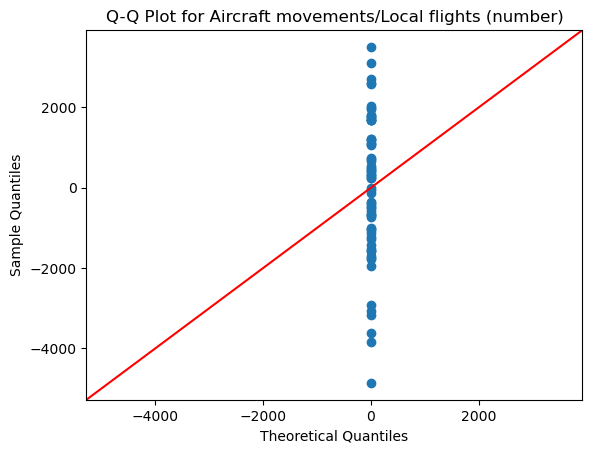

Variance Inflation Factor (VIF) for Aircraft movements/Local flights (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                        OLS Regression Results                                       
Dep. Variable:     Aircraft movements/Local flights (number)   R-squared:                       0.302
Model:                                                   OLS   Adj. R-squared:                  0.269
Method:                                        Least Squares   F-statistic:                     9.230
Date:                                       Tue, 08 Oct 2024   Prob (F-statistic):           3.70e-05
Time:                                               23:08:39   Log-Likelihood:                -603.24
No. Observations:                                         68   AIC:                             1214.
Df Residuals:                                             64   BIC:    

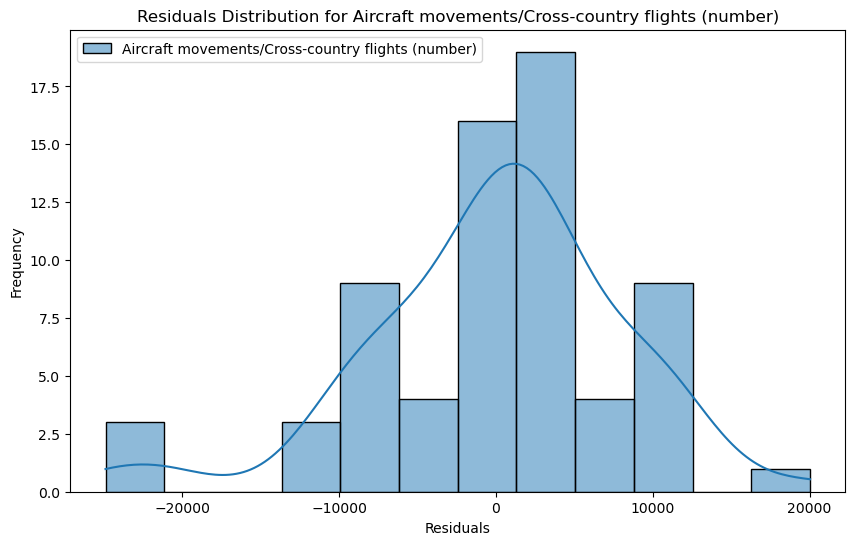

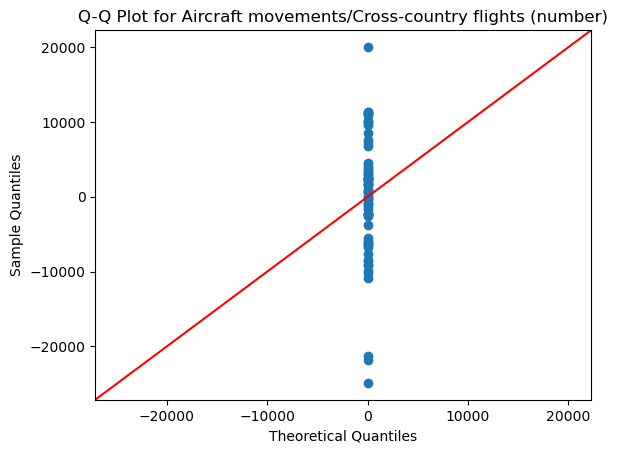

Variance Inflation Factor (VIF) for Aircraft movements/Cross-country flights (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                            OLS Regression Results                                           
Dep. Variable:     Aircraft movements/Cross-country flights (number)   R-squared:                       0.616
Model:                                                           OLS   Adj. R-squared:                  0.598
Method:                                                Least Squares   F-statistic:                     34.27
Date:                                               Tue, 08 Oct 2024   Prob (F-statistic):           2.49e-13
Time:                                                       23:08:39   Log-Likelihood:                -707.39
No. Observations:                                                 68   AIC:                             1423.
Df Resi

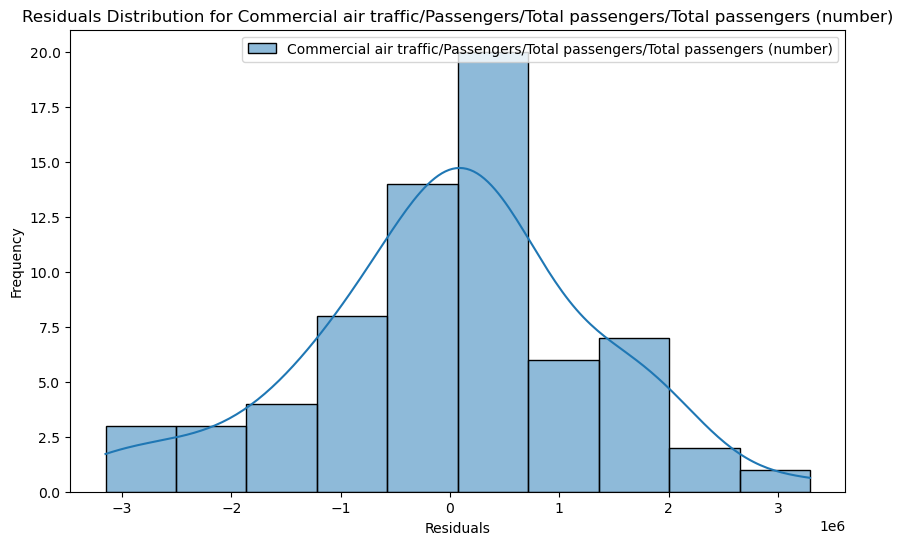

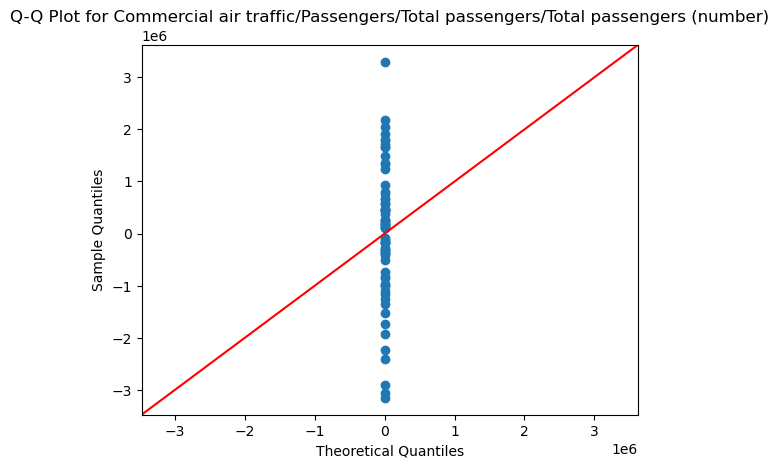

Variance Inflation Factor (VIF) for Commercial air traffic/Passengers/Total passengers/Total passengers (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                                         OLS Regression Results                                                         
Dep. Variable:     Commercial air traffic/Passengers/Total passengers/Total passengers (number)   R-squared:                       0.685
Model:                                                                                      OLS   Adj. R-squared:                  0.670
Method:                                                                           Least Squares   F-statistic:                     46.29
Date:                                                                          Tue, 08 Oct 2024   Prob (F-statistic):           4.98e-16
Time:                                                            

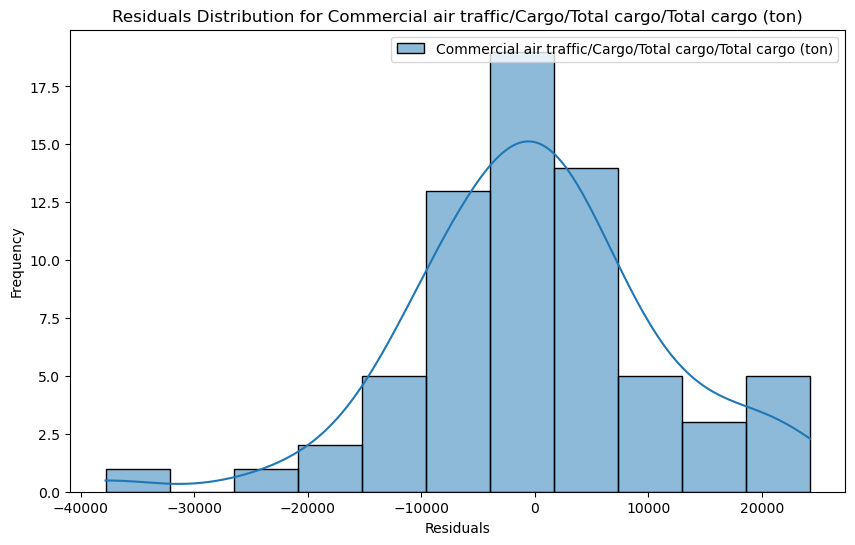

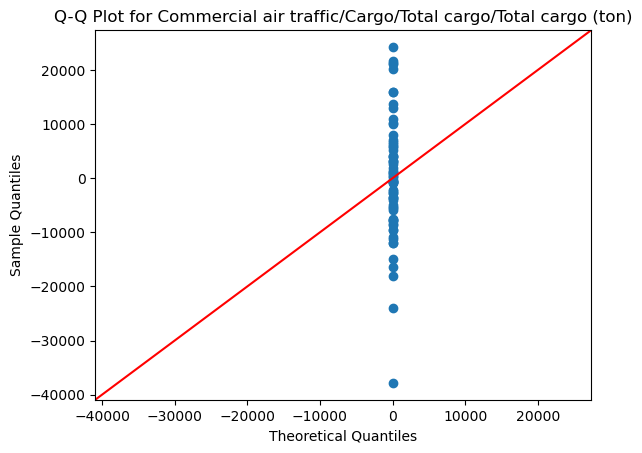

Variance Inflation Factor (VIF) for Commercial air traffic/Cargo/Total cargo/Total cargo (ton):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                                OLS Regression Results                                                
Dep. Variable:     Commercial air traffic/Cargo/Total cargo/Total cargo (ton)   R-squared:                       0.352
Model:                                                                    OLS   Adj. R-squared:                  0.322
Method:                                                         Least Squares   F-statistic:                     11.59
Date:                                                        Tue, 08 Oct 2024   Prob (F-statistic):           3.68e-06
Time:                                                                23:08:40   Log-Likelihood:                -728.62
No. Observations:                                     

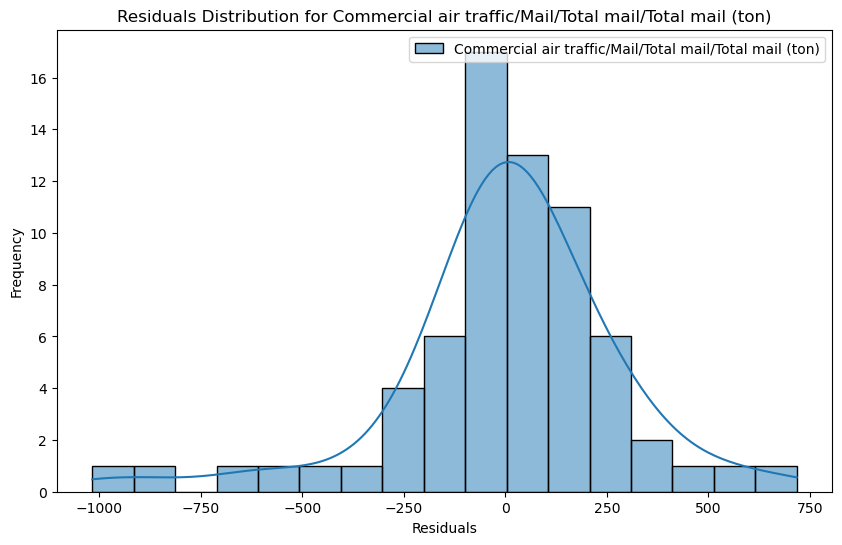

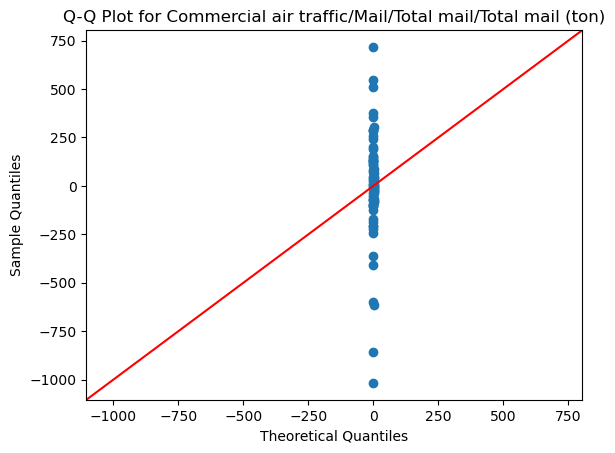

Variance Inflation Factor (VIF) for Commercial air traffic/Mail/Total mail/Total mail (ton):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                               OLS Regression Results                                              
Dep. Variable:     Commercial air traffic/Mail/Total mail/Total mail (ton)   R-squared:                       0.729
Model:                                                                 OLS   Adj. R-squared:                  0.716
Method:                                                      Least Squares   F-statistic:                     57.38
Date:                                                     Tue, 08 Oct 2024   Prob (F-statistic):           3.98e-18
Time:                                                             23:08:40   Log-Likelihood:                -478.97
No. Observations:                                                       68 

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate additional evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Prepare data
X = merged_df[['new_cases', 'monthly_deaths', 'monthly_vaccinations']]  # Independent variables

variables = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]
# Variable to save results
regression_results = {}

# Perform multiple linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Dependent variable
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Calculate evaluation metrics
    mse, r2 = evaluate_model(Y, y_pred)
    
    # Save regression coefficients and intercept
    regression_results[variable] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_[0],
        'r_squared': model.score(X, Y),
        'mse': mse,
        'r2': r2  
    }
    
    # Residual analysis
    residuals = Y - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for {variable}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    # Q-Q plot for residuals
    sm.qqplot(residuals, line='45')
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print(f'Variance Inflation Factor (VIF) for {variable}:')
    print(vif_data)
    
    # Significance test using statsmodels
    X_with_const = sm.add_constant(X)
    sm_model = sm.OLS(Y, X_with_const).fit()
    print(sm_model.summary())

# Display results
print("Regression Results:")
for variable, result in regression_results.items():
    print(f"{variable}: {result}")

### Attempting Multiple Linear Regression with Log Transformation

In this section, we will attempt to use a Multiple Linear Regression model to predict various aviation-related variables based on the number of new COVID-19 cases, monthly deaths, and monthly vaccinations. We will apply a log transformation to the dependent variables to stabilize variance and make the data more normally distributed. 

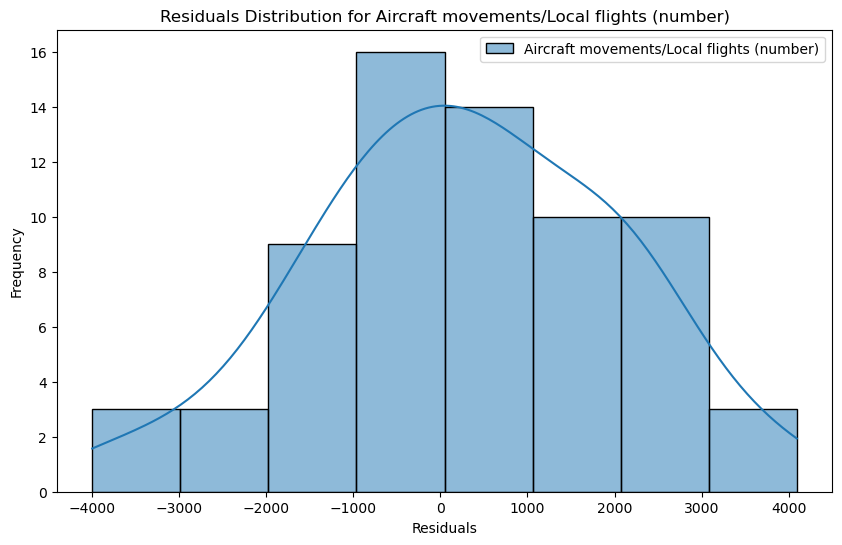

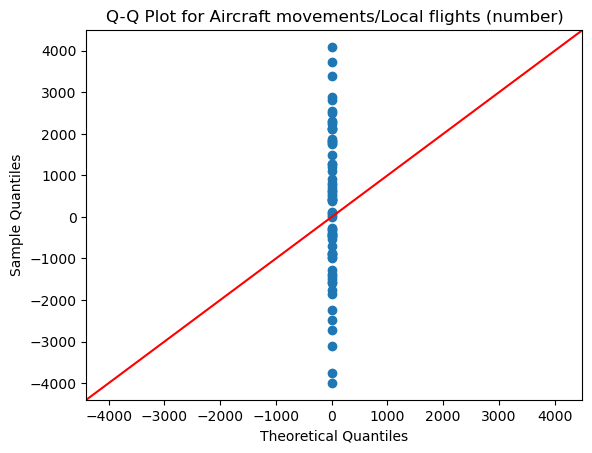

Variance Inflation Factor (VIF) for Aircraft movements/Local flights (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                        OLS Regression Results                                       
Dep. Variable:     Aircraft movements/Local flights (number)   R-squared:                       0.284
Model:                                                   OLS   Adj. R-squared:                  0.250
Method:                                        Least Squares   F-statistic:                     8.458
Date:                                        周二, 08 10月 2024   Prob (F-statistic):           8.16e-05
Time:                                               23:20:59   Log-Likelihood:                -18.819
No. Observations:                                         68   AIC:                             45.64
Df Residuals:                                             64   BIC:    

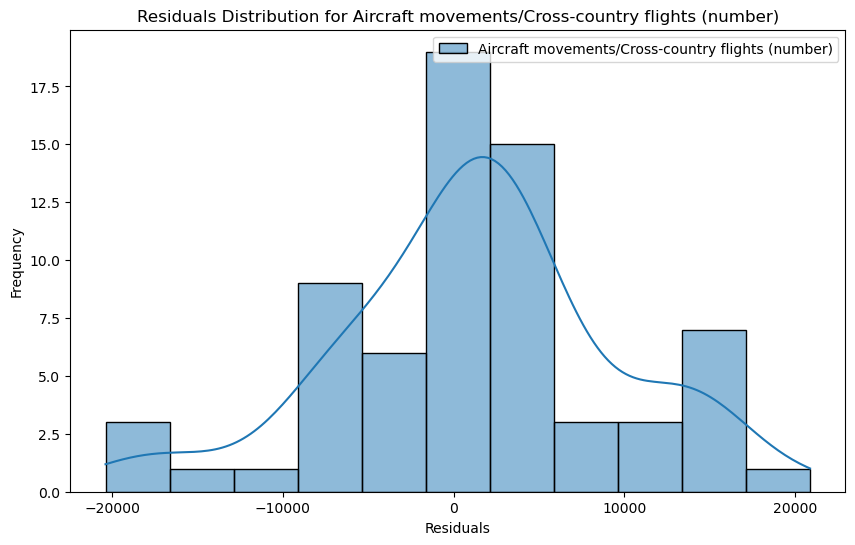

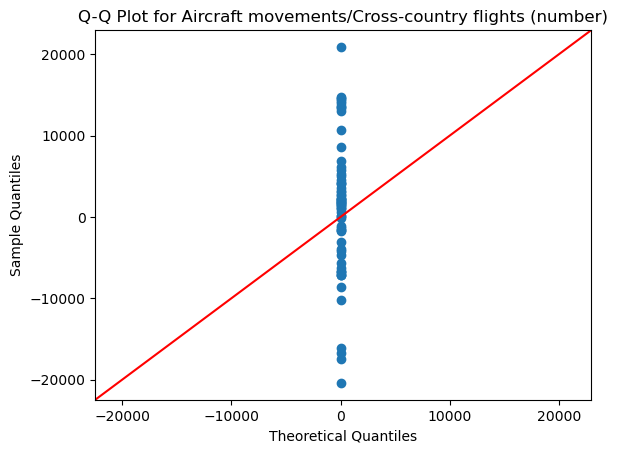

Variance Inflation Factor (VIF) for Aircraft movements/Cross-country flights (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                            OLS Regression Results                                           
Dep. Variable:     Aircraft movements/Cross-country flights (number)   R-squared:                       0.523
Model:                                                           OLS   Adj. R-squared:                  0.500
Method:                                                Least Squares   F-statistic:                     23.35
Date:                                                周二, 08 10月 2024   Prob (F-statistic):           2.51e-10
Time:                                                       23:20:59   Log-Likelihood:                -18.819
No. Observations:                                                 68   AIC:                             45.64
Df Resi

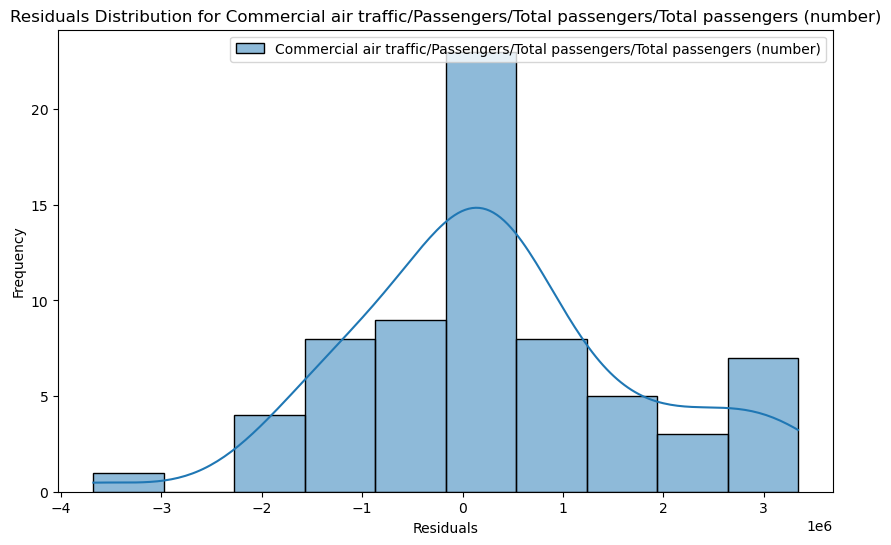

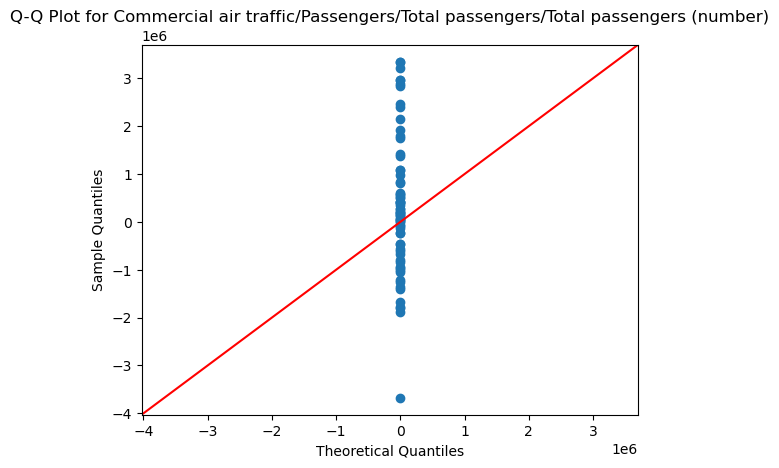

Variance Inflation Factor (VIF) for Commercial air traffic/Passengers/Total passengers/Total passengers (number):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                                         OLS Regression Results                                                         
Dep. Variable:     Commercial air traffic/Passengers/Total passengers/Total passengers (number)   R-squared:                       0.556
Model:                                                                                      OLS   Adj. R-squared:                  0.535
Method:                                                                           Least Squares   F-statistic:                     26.68
Date:                                                                           周二, 08 10月 2024   Prob (F-statistic):           2.60e-11
Time:                                                            

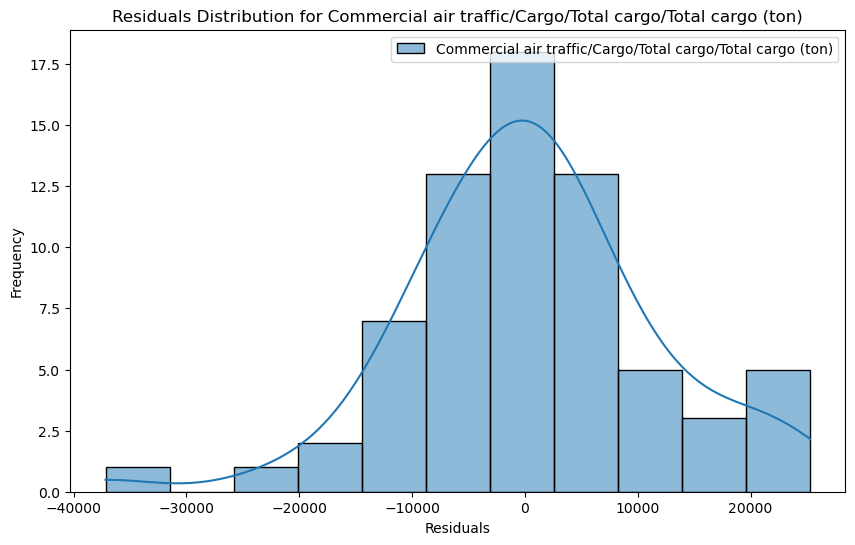

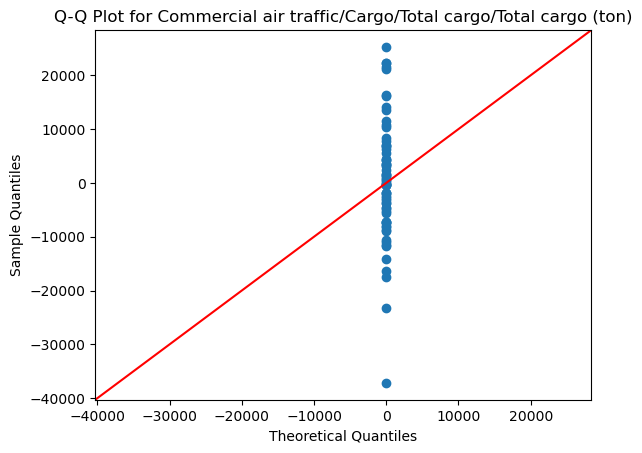

Variance Inflation Factor (VIF) for Commercial air traffic/Cargo/Total cargo/Total cargo (ton):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                                OLS Regression Results                                                
Dep. Variable:     Commercial air traffic/Cargo/Total cargo/Total cargo (ton)   R-squared:                       0.342
Model:                                                                    OLS   Adj. R-squared:                  0.312
Method:                                                         Least Squares   F-statistic:                     11.11
Date:                                                         周二, 08 10月 2024   Prob (F-statistic):           5.82e-06
Time:                                                                23:21:00   Log-Likelihood:                 73.625
No. Observations:                                     

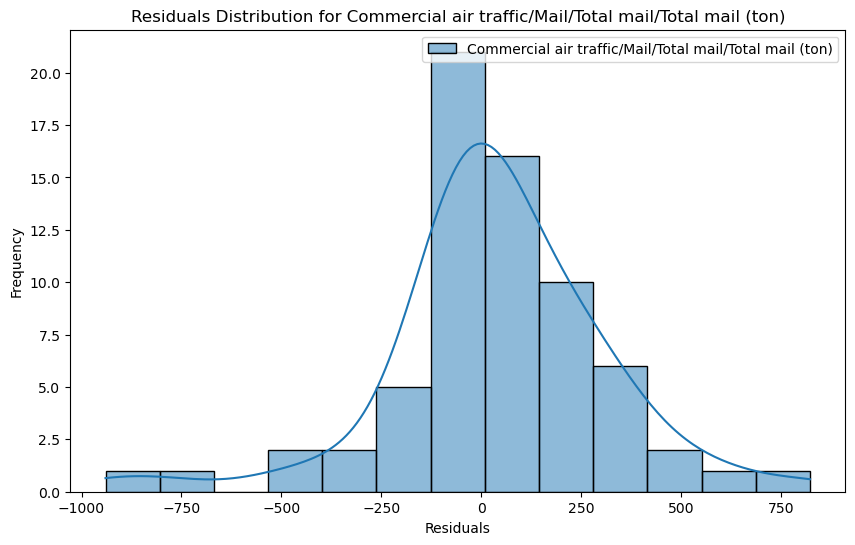

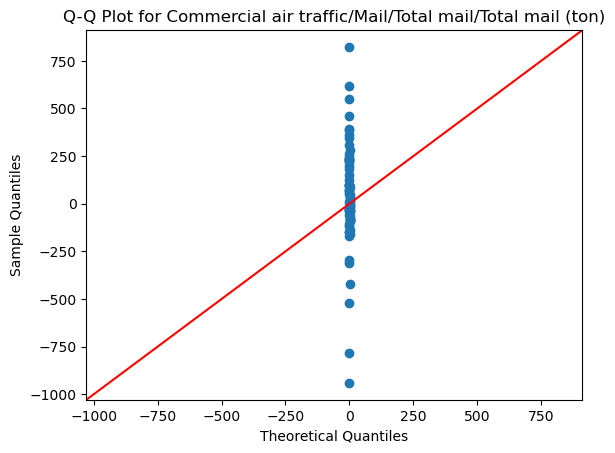

Variance Inflation Factor (VIF) for Commercial air traffic/Mail/Total mail/Total mail (ton):
                feature       VIF
0             new_cases  2.204794
1        monthly_deaths  1.755949
2  monthly_vaccinations  1.380977
                                               OLS Regression Results                                              
Dep. Variable:     Commercial air traffic/Mail/Total mail/Total mail (ton)   R-squared:                       0.737
Model:                                                                 OLS   Adj. R-squared:                  0.725
Method:                                                      Least Squares   F-statistic:                     59.94
Date:                                                      周二, 08 10月 2024   Prob (F-statistic):           1.44e-18
Time:                                                             23:21:00   Log-Likelihood:                -8.3790
No. Observations:                                                       68 

In [13]:
# Variable to save results
regression_results = {}

# Perform multiple linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Dependent variable
    
    # Apply log transformation to the dependent variable
    Y_transformed = np.log1p(Y)
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y_transformed)
    
    # Predict
    y_pred = model.predict(X)
    
    # Inverse log transformation of predictions
    y_pred_inverse = np.expm1(y_pred)
    
    # Calculate evaluation metrics
    mse, r2 = evaluate_model(Y, y_pred_inverse)
    
    # Save regression coefficients and intercept
    regression_results[variable] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_[0],
        'r_squared': model.score(X, Y_transformed),
        'mse': mse,
        'r2': r2  
    }
    
    # Residual analysis
    residuals = Y - y_pred_inverse
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for {variable}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    # Q-Q plot for residuals
    sm.qqplot(residuals, line='45')
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print(f'Variance Inflation Factor (VIF) for {variable}:')
    print(vif_data)
    
    # Significance test using statsmodels
    X_with_const = sm.add_constant(X)
    sm_model = sm.OLS(Y_transformed, X_with_const).fit()
    print(sm_model.summary())

# Display results
print("Regression Results:")
for variable, result in regression_results.items():
    print(f"{variable}: {result}")

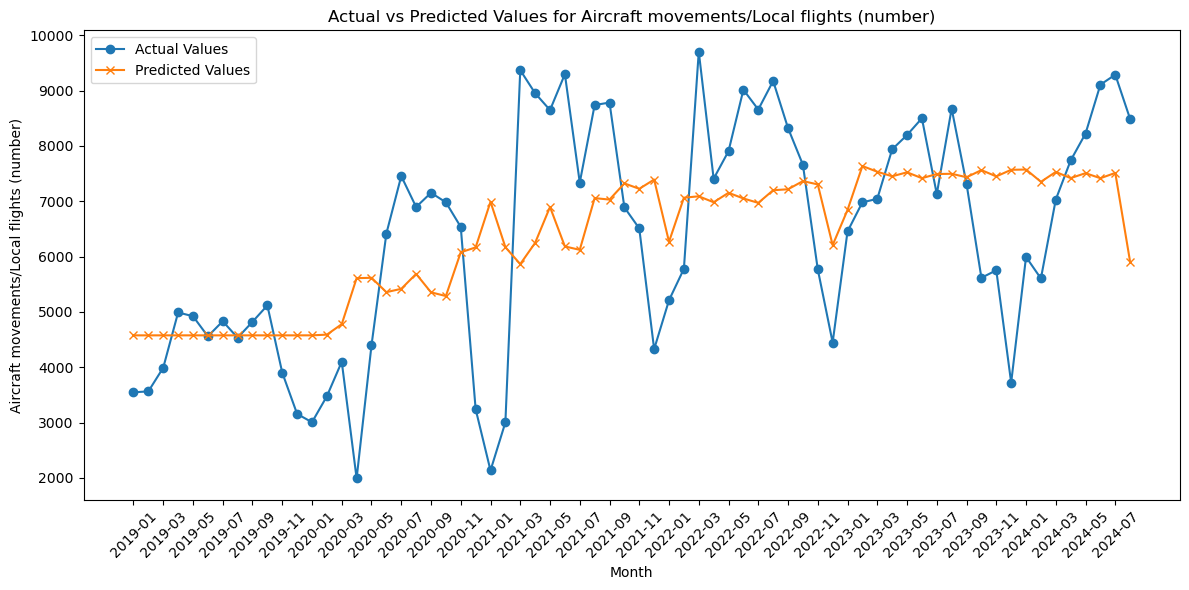

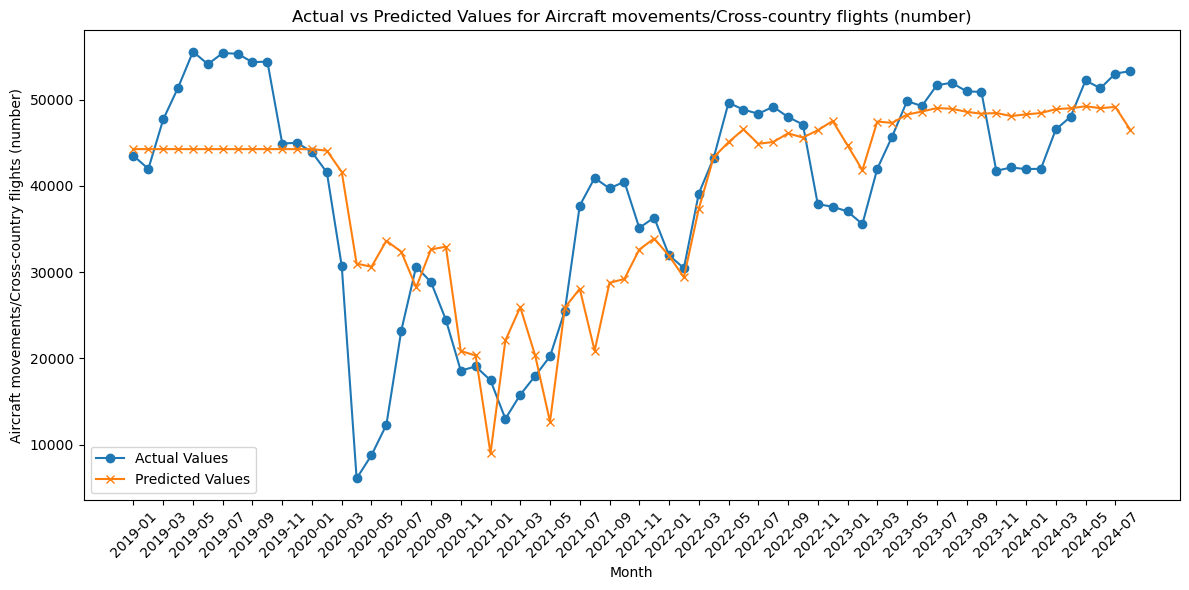

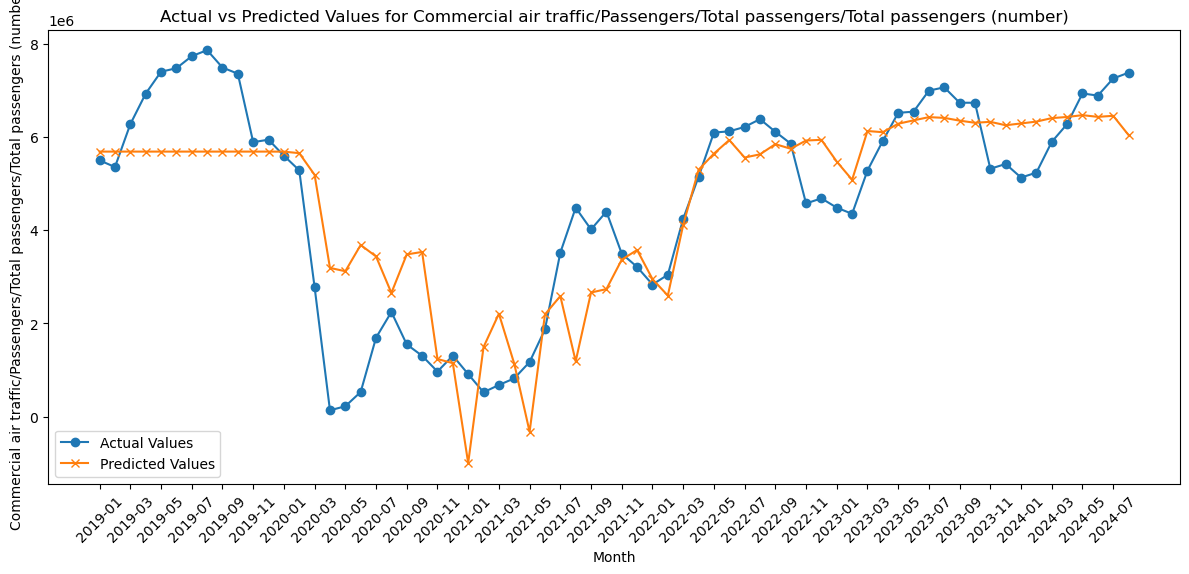

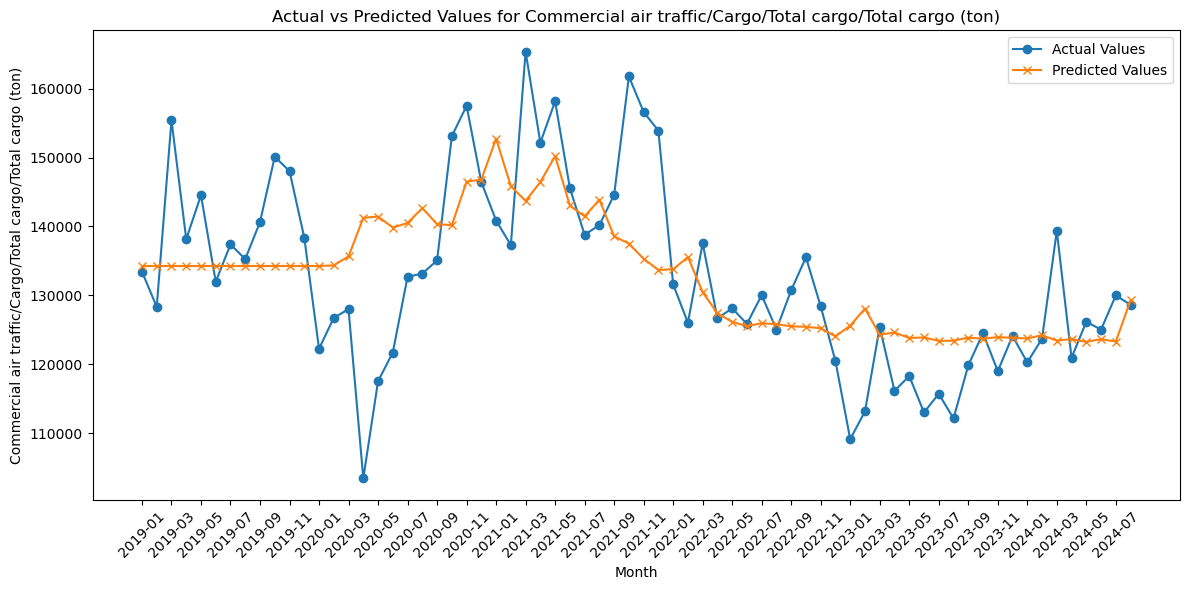

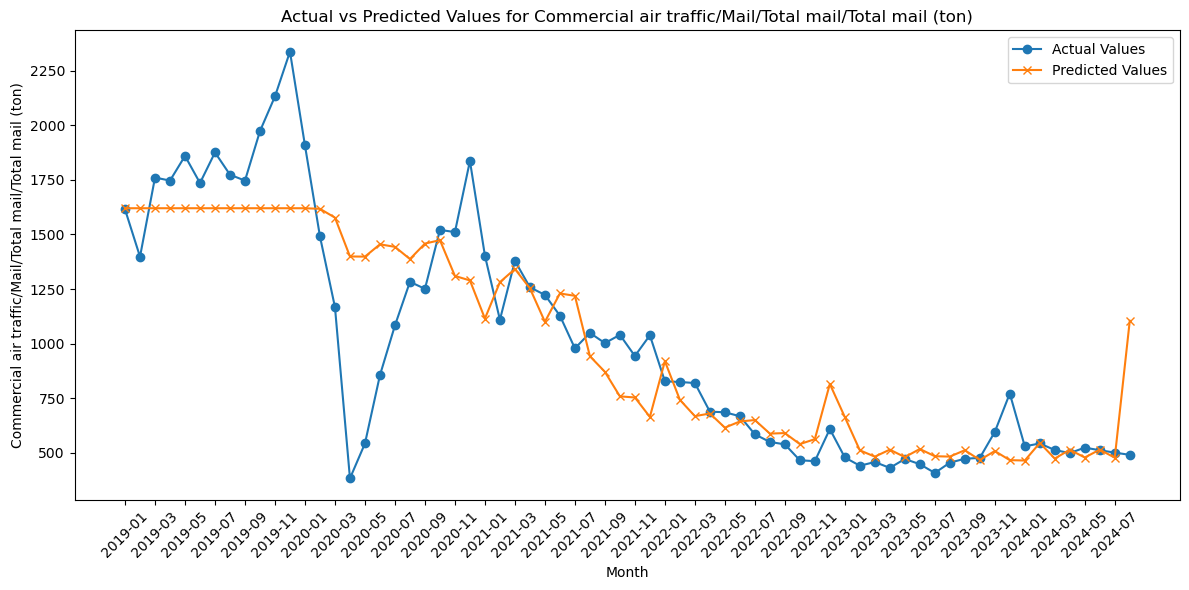

In [14]:
# Prepare data
X = merged_df[['new_cases', 'monthly_deaths', 'monthly_vaccinations']] 

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Dependent variable
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Plot actual and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['month'], Y, label='Actual Values', marker='o')
    plt.plot(merged_df['month'], y_pred, label='Predicted Values', marker='x')
    plt.xlabel('Month')
    plt.ylabel(variable)
    plt.title(f'Actual vs Predicted Values for {variable}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks()[::2])  # Show every second label
    plt.show()

### Attempting Random Forest Model

In this section, we will attempt to use a Random Forest model to predict various aviation-related variables based on the number of new COVID-19 cases. The variables we will analyze include:

- Aircraft movements/Local flights (number)
- Aircraft movements/Cross-country flights (number)
- Commercial air traffic/Passengers/Total passengers/Total passengers (number)
- Commercial air traffic/Cargo/Total cargo/Total cargo (ton)
- Commercial air traffic/Mail/Total mail/Total mail (ton)

We will split the data into training and testing sets, fit the Random Forest model, and evaluate its performance using metrics such as Mean Squared Error (MSE) and R-squared (R²). Additionally, we will visualize the actual vs. predicted values for each variable.

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the aviation-related variables
aviation_vars = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Define the pandemic-related variables
covid_vars = ['new_cases', 'monthly_deaths', 'monthly_vaccinations']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    merged_df[covid_vars],
    merged_df[aviation_vars],
    test_size=0.4,
    random_state=42
)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Predict on the test data
Y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test data
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2 Score: {test_r2}")

# Print feature importances
feature_importances = rf_model.feature_importances_
features = covid_vars
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(importance_df)


Test Mean Squared Error: 215993945235.1363
Test R^2 Score: 0.6337518052163386
                Feature  Importance
0             new_cases    0.028951
1        monthly_deaths    0.839350
2  monthly_vaccinations    0.131699


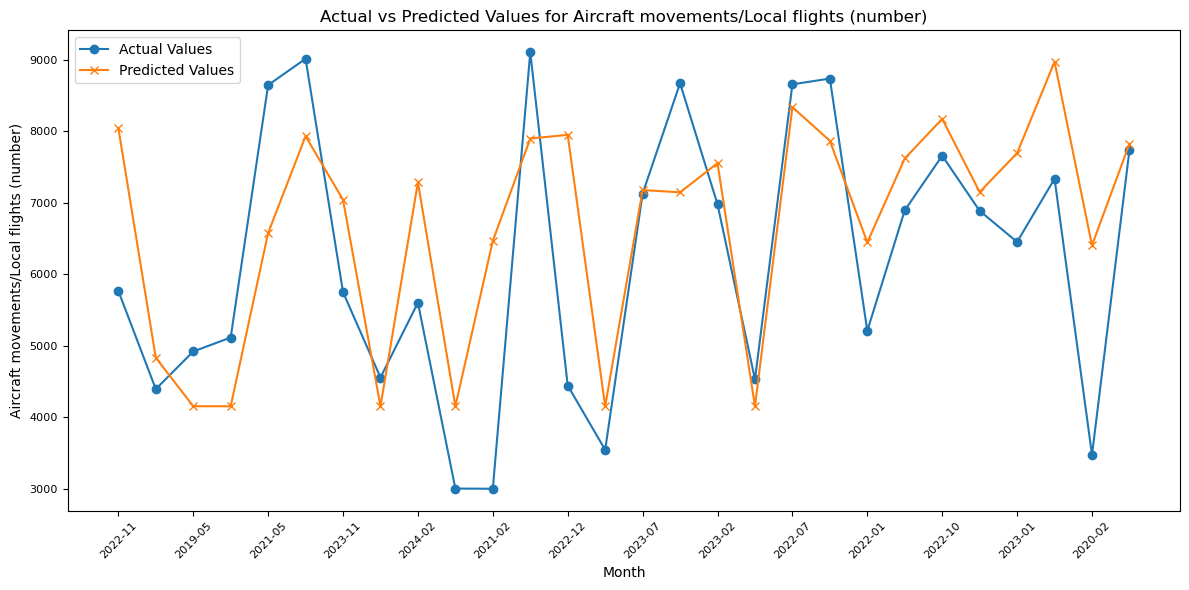

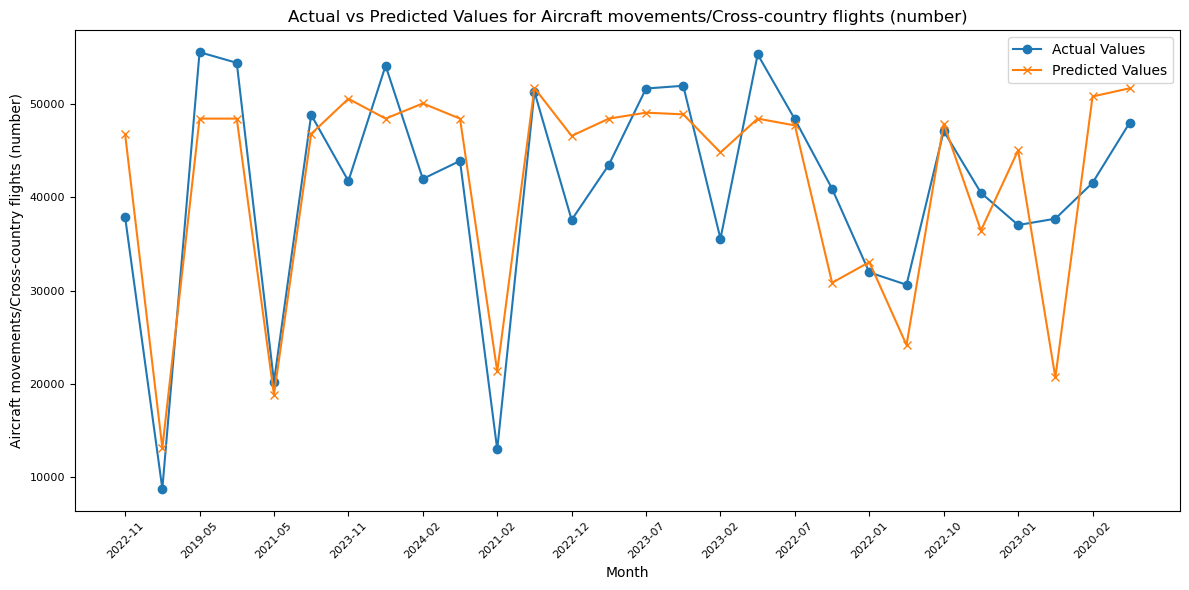

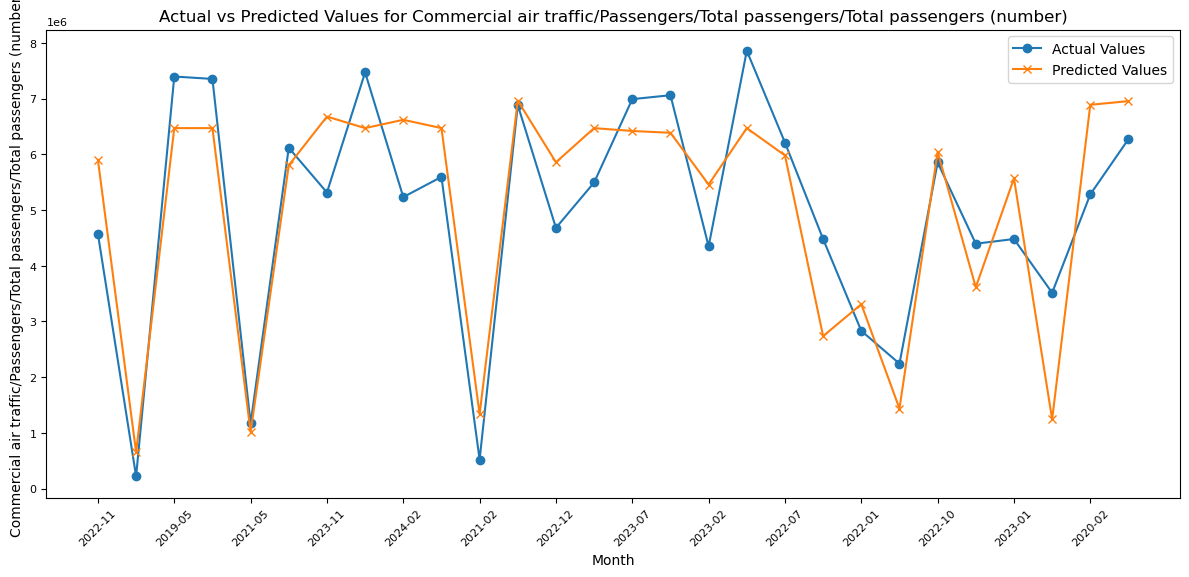

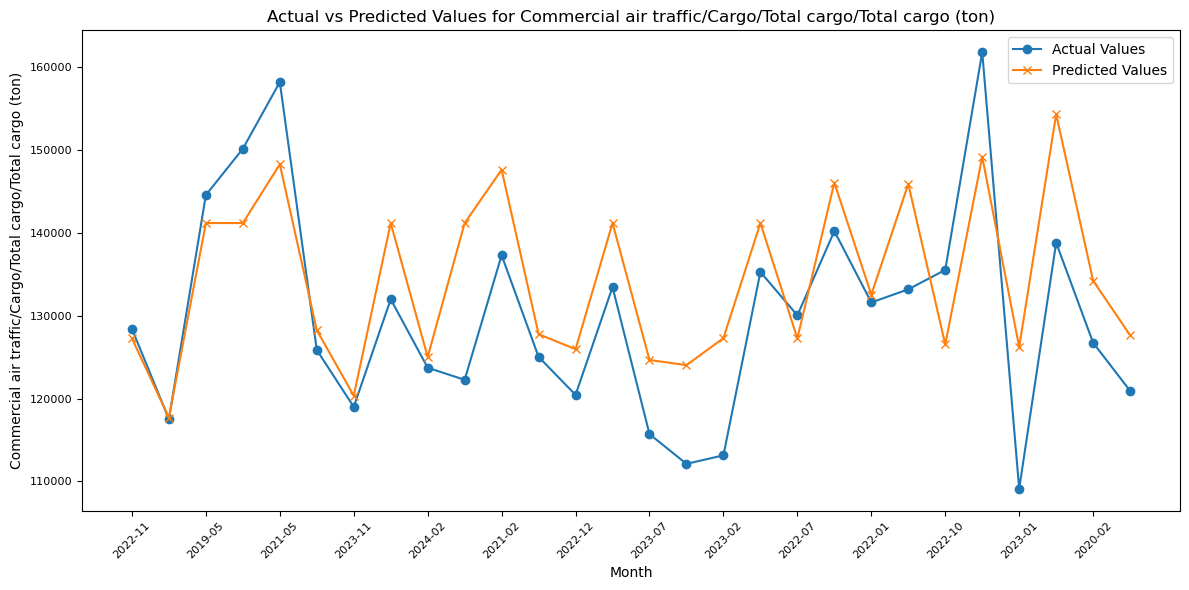

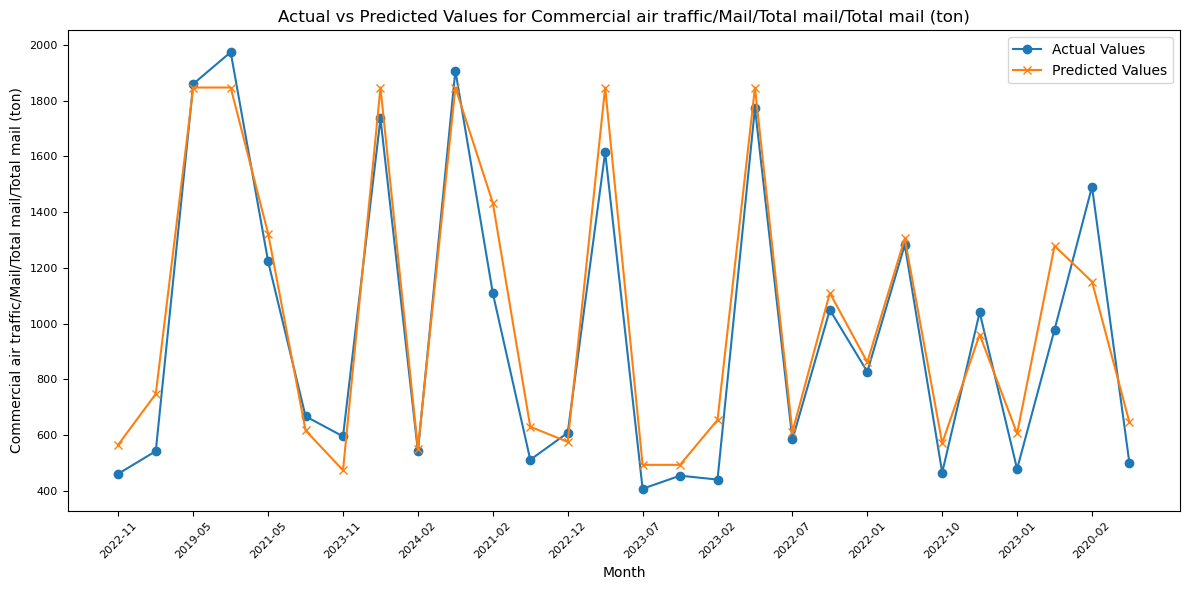

In [52]:
import matplotlib.pyplot as plt

# Define the aviation-related variables
aviation_vars = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Plot actual vs predicted values for each variable
for i, variable in enumerate(aviation_vars):
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['month'][X_test.index], Y_test[variable], label='Actual Values', marker='o')
    plt.plot(merged_df['month'][X_test.index], Y_test_pred[:, i], label='Predicted Values', marker='x')
    plt.xlabel('Month')
    plt.ylabel(variable)
    plt.title(f'Actual vs Predicted Values for {variable}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks()[::2])  # Show every second label
    plt.show()

### Time series analysis for 5 aviation data and 3 covid-related data

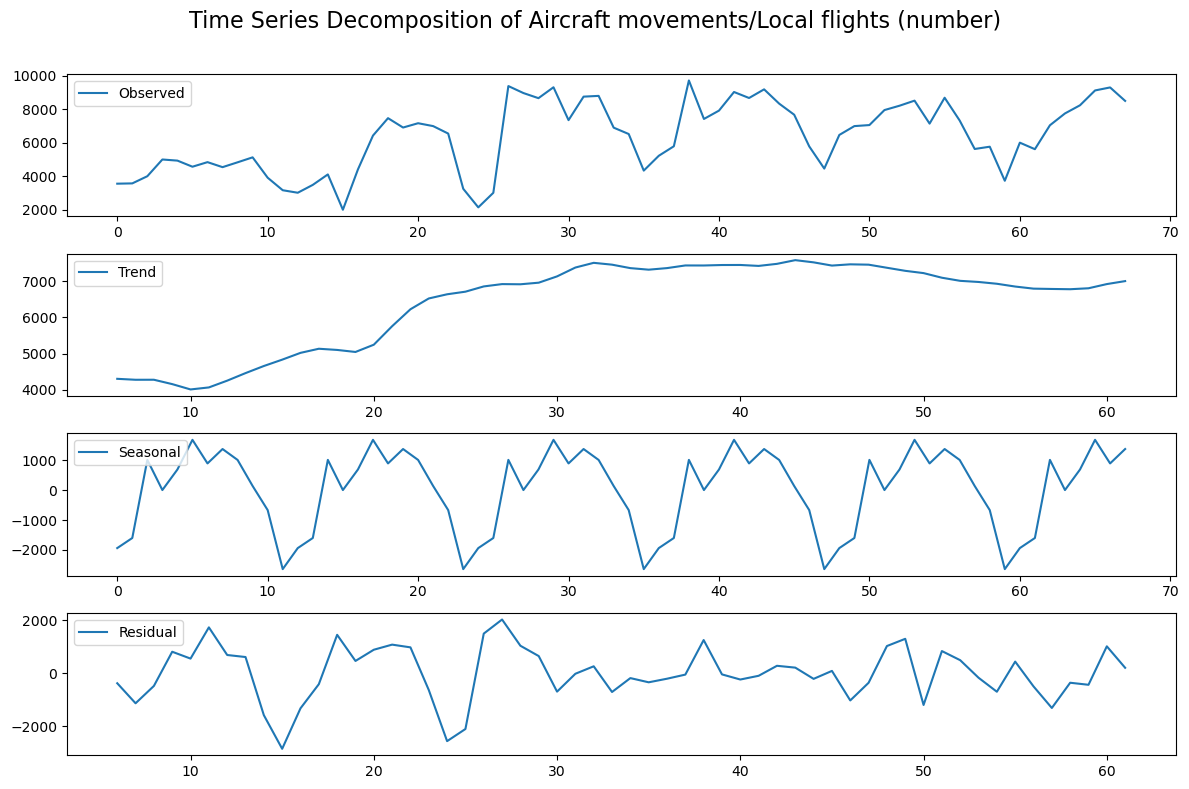

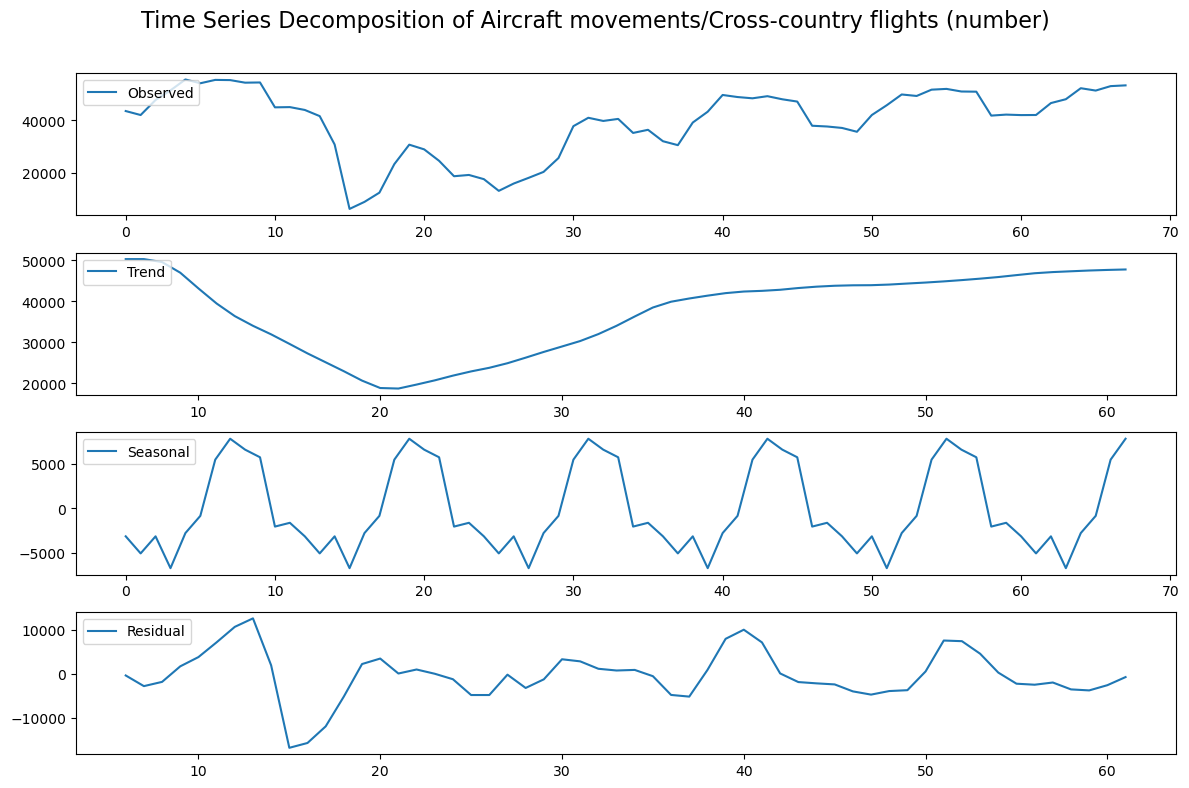

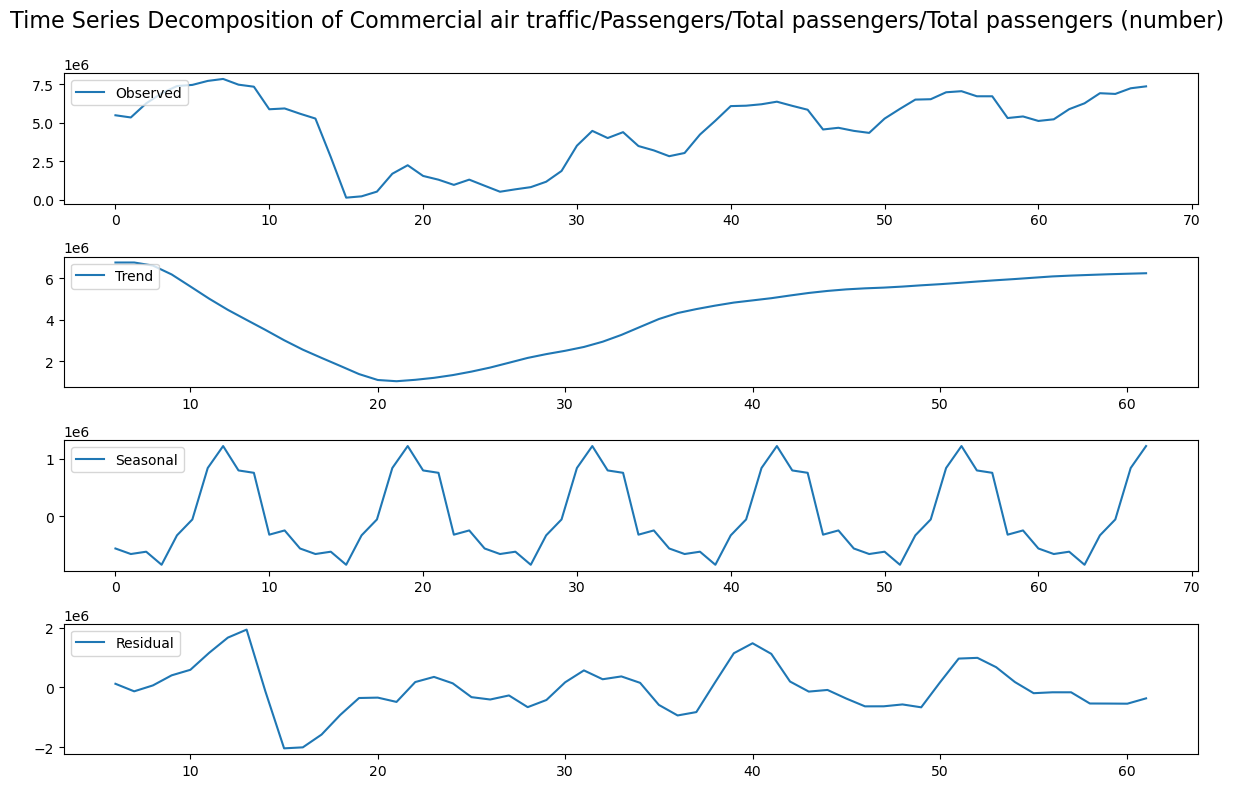

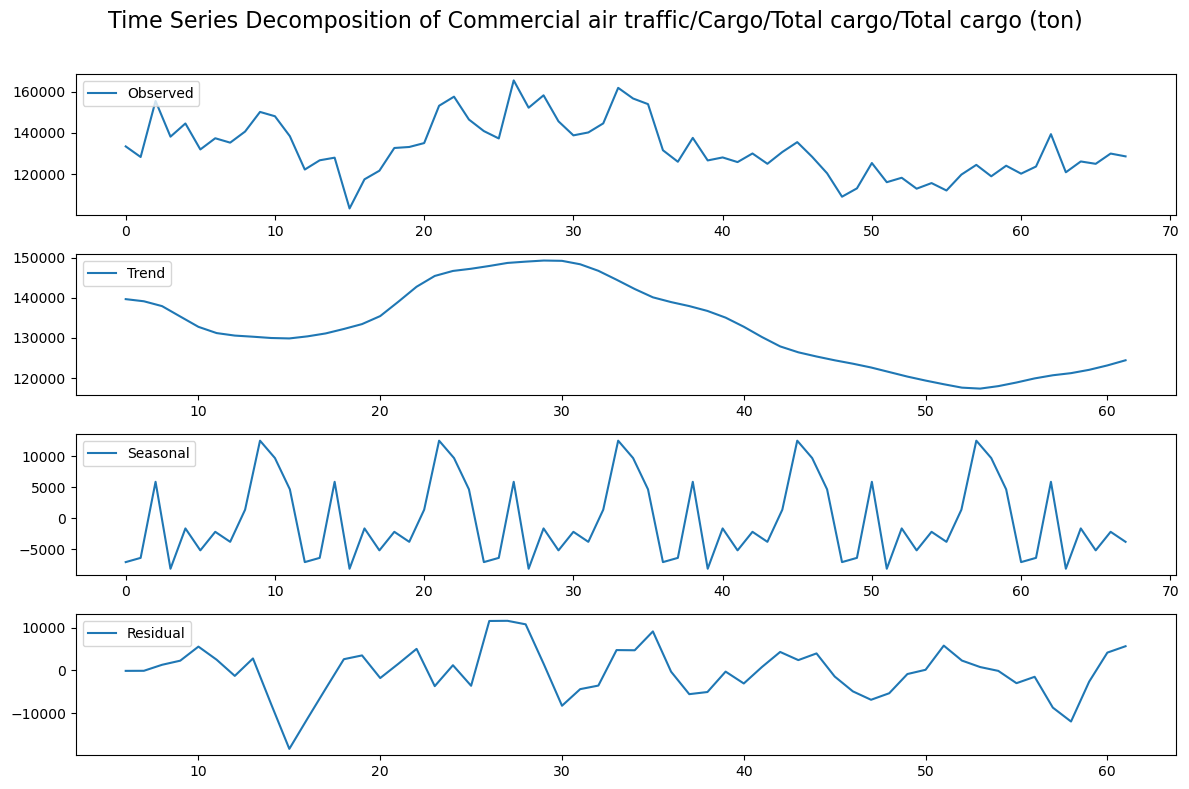

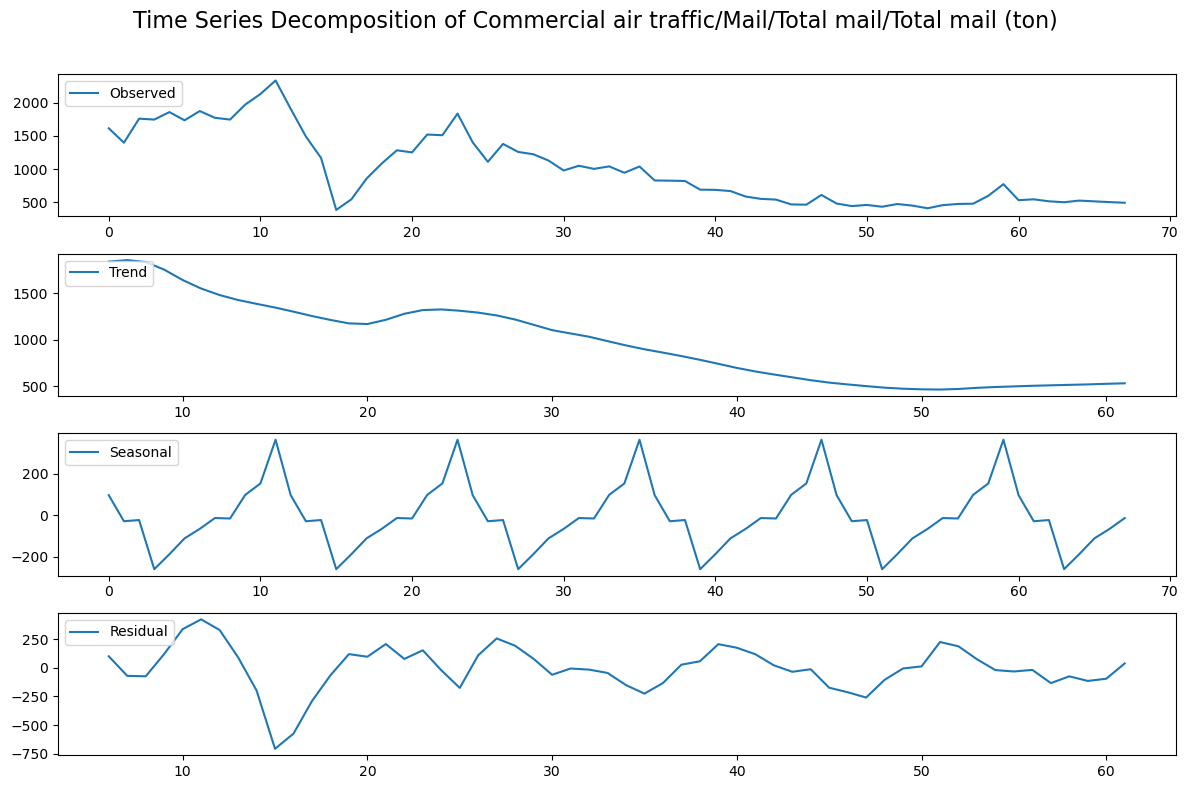

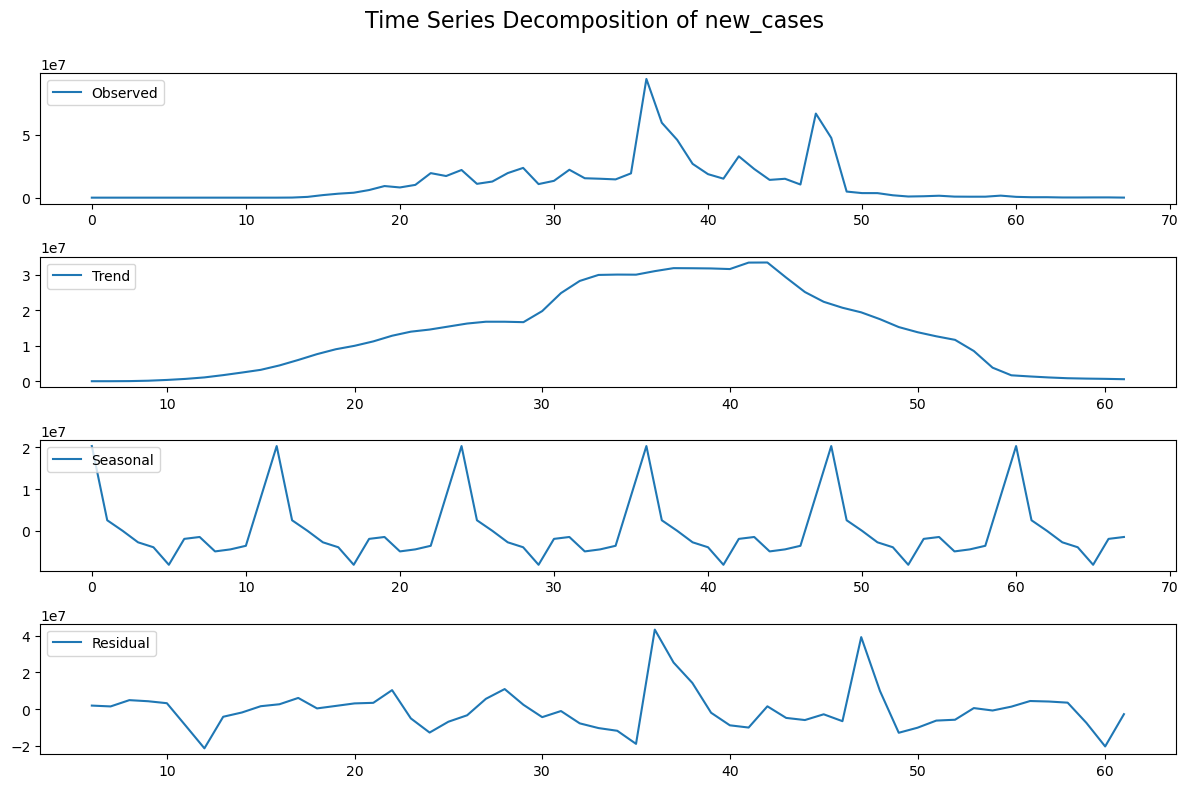

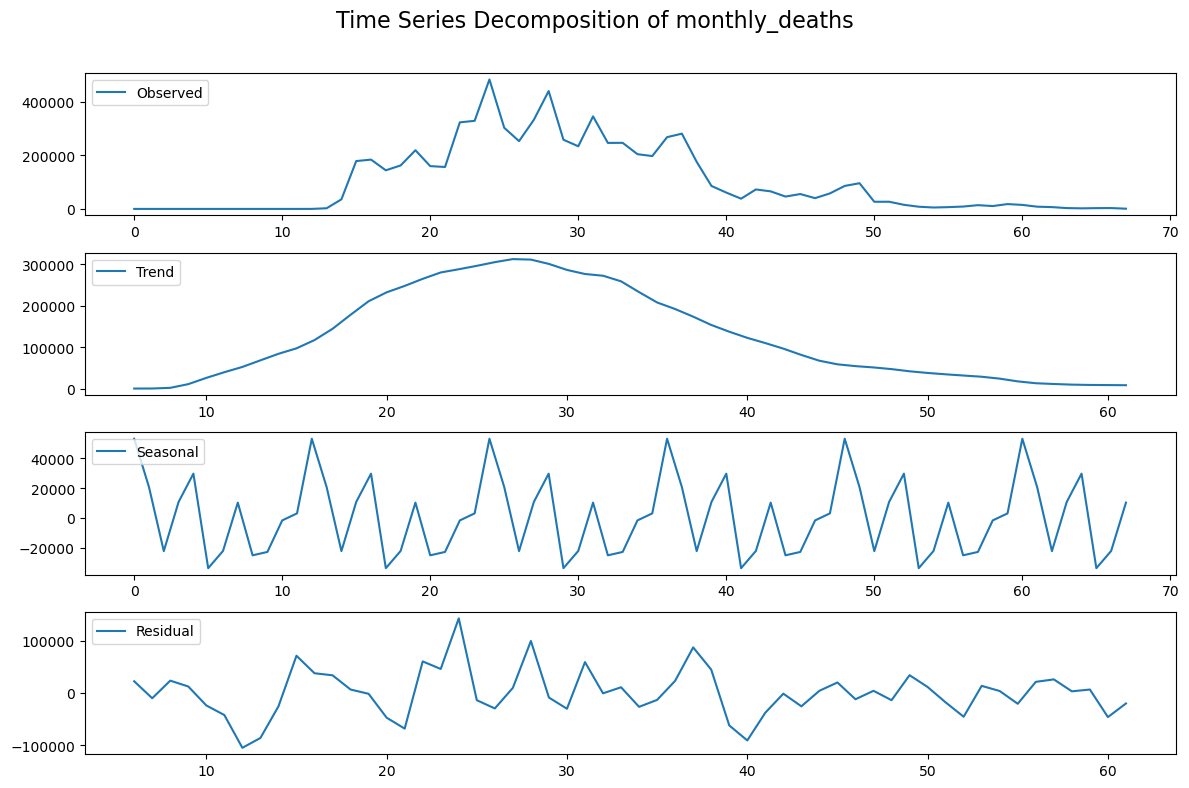

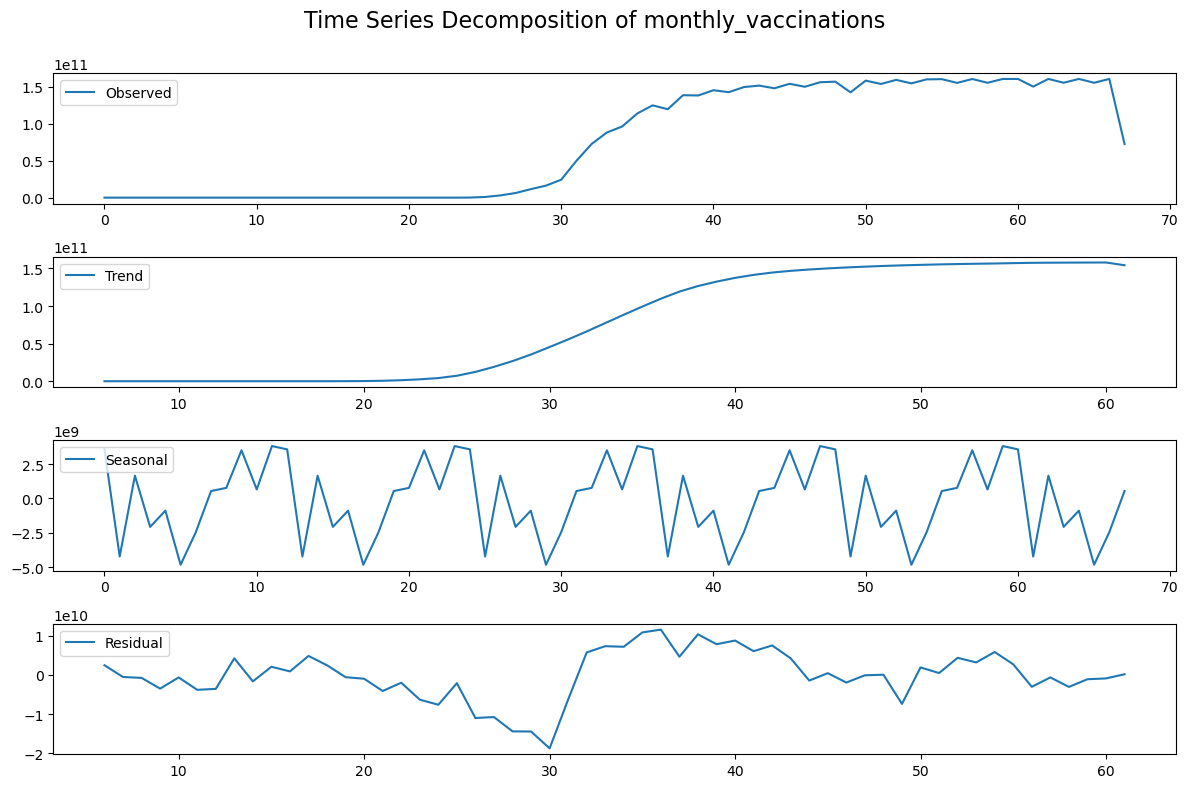

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent and independent variables
dependent_vars = [
    'Aircraft movements/Local flights (number)', 
    'Aircraft movements/Cross-country flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

independent_vars = ['new_cases', 'monthly_deaths', 'monthly_vaccinations']

# Function to perform time series decomposition
def decompose_time_series(data, column, model='multiplicative', freq=12):
    decomposition = sm.tsa.seasonal_decompose(data[column], model=model, period=freq)
    return decomposition

# Perform decomposition and plot results for each variable
for var in dependent_vars + independent_vars:
    decomposition = decompose_time_series(merged_df, var, model='additive')
    
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Time Series Decomposition of {var}', fontsize=16)
    
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()